## Lead Scoring Case Study

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
X Education has appointed us to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. 
The company requires:-
 1. To build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


The steps are broadly:
1. Reading and understanding the data
2. Cleaning the data
3. Visualization of data
3. Preparing the data for modelling
4. Modelling
5. Final analysis
6. Conclusion

### Step 1: Reading and understanding the Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing all datasets
leads_data = pd.read_csv("Leads.csv")
leads_data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


####  Inspecting the Dataframe

In [4]:
# Let's see the head of our data
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Let's check the dimensions of the dataframe
leads_data.shape

(9240, 37)

In [6]:
# let's look at the statistical aspects of the dataframe
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Let's see the type of each column
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# checking duplicates
sum(leads_data.duplicated(subset = 'Prospect ID')) == 0

True

No duplicate values

### Step 2: Cleaning the data

In [9]:
# As we can observe that there are select values for many column.
# This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

# Converting 'Select' values to NaN.
leads_data = leads_data.replace('Select', np.nan)

In [10]:
# Calculating the Missing Values % contribution in Dataframe
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Dropping the columns having more than 50% NA values.

In [11]:
# we will drop the columns having more than 50% NA values.
leads_data = leads_data.drop(leads_data.loc[:,list(round(100*(leads_data.isnull().sum()/len(leads_data.index)),
                                                         2)>50)].columns, 1)
leads_data.shape

(9240, 34)

In [12]:
# Calculating the Missing Values % contribution in Dataframe
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### 2.1 Dropping Unnecessary Columns which are not needed for Analysis.

In [13]:
leads_data.shape

(9240, 34)

In [14]:
# Identifying if any column exists with only null values
leads_data.isnull().all(axis=0).any()

False

In [15]:
# Identifying columns which has only one unique value
print(leads_data.nunique(dropna=False).sort_values())

Magazine                                            1
Update me on Supply Chain Content                   1
Get updates on DM Content                           1
I agree to pay the amount through cheque            1
Receive More Updates About Our Courses              1
Do Not Call                                         2
Converted                                           2
Digital Advertisement                               2
Newspaper                                           2
Through Recommendations                             2
Do Not Email                                        2
Search                                              2
A free copy of Mastering The Interview              2
Newspaper Article                                   2
X Education Forums                                  2
Asymmetrique Profile Index                          4
Asymmetrique Activity Index                         4
What matters most to you in choosing a course       4
Lead Origin                 

In [16]:
#Remove columns which has only one unique value

"""
Deleting the following columns as they have only one unique value and hence cannot be responsible in predicting a successful 
lead case

Magazine:                                   Indicating whether the customer had seen the ad in any of the listed items.
Update me on Supply Chain Content:          Indicates whether the customer wants updates on the Supply Chain Content.
Get updates on DM Content:                  Indicates whether the customer wants updates on the DM Content.
Receive More Updates About Our Courses:     Indicates whether the customer chose to receive more updates about the courses.
I agree to pay the amount through cheque:   Indicates whether the customer has agreed to pay the amount through cheque or not.

"""   
leads_data= leads_data.loc[:,leads_data.nunique()!=1]
leads_data.shape

(9240, 29)

In [17]:
# Deleting the columns 'Asymmetrique Activity Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
# 'Asymmetrique Profile Index' and Tags as these columns are prepared by sales team.
leads_data = leads_data.drop('Asymmetrique Activity Index', axis=1)
leads_data = leads_data.drop('Asymmetrique Activity Score', axis=1)
leads_data = leads_data.drop('Asymmetrique Profile Score', axis=1)
leads_data = leads_data.drop('Asymmetrique Profile Index', axis=1)
leads_data = leads_data.drop('Tags', axis=1)
leads_data.shape

(9240, 24)

In [18]:
leads_data = leads_data.drop('Prospect ID', axis=1)
#leads = leads.drop('Lead Number', axis=1)
leads_data.shape

(9240, 23)

### 2.2 Checking and dropping the columns that are highly skewed

In [19]:
df=leads_data[['Lead Origin','Lead Source','X Education Forums','Do Not Email','Do Not Call','Converted','TotalVisits','Total Time Spent on Website','What matters most to you in choosing a course','Search','City','Specialization','Page Views Per Visit','Last Activity','Country','What is your current occupation','Newspaper Article','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview','Last Notable Activity']]

for c in df.columns:
    print ("-----------------------------------------------------" )
    print ("---- %s ---" % c)
    print( df[c].value_counts(normalize=True))

-----------------------------------------------------
---- Lead Origin ---
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
-----------------------------------------------------
---- Lead Source ---
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Live Chat            0.000217
Social Media         0.000217
Press_Release        0.000217
WeLearn              0.000109
welearnblog_Home     0.000109
NC_EDM               0.000109
youtubechannel       0.000109
Pay per Click Ads    0.000109
blog                 0.000109
testone              0.000109
Name: 

In [20]:
leads_data['Through Recommendations'].value_counts(normalize=True)

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

In [21]:
# Deleting the column 'What matters most to you in choosing a course' as it is highly skewed column.
leads_data = leads_data.drop(['What matters most to you in choosing a course','Do Not Email','Do Not Call','Search','Through Recommendations','Newspaper','Newspaper Article','Digital Advertisement','X Education Forums'], axis=1)
leads_data.shape

(9240, 14)

In [22]:
# Calculating the Missing Values % contribution in Dataframe
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                   26.63
Specialization                            36.58
What is your current occupation           29.11
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [23]:
# checking the column 'Lead Origin': The origin identifier with which the customer was identified to be a lead.Includes API, 
# Landing Page Submission,etc
leads_data['Lead Origin'].describe()

count                        9240
unique                          5
top       Landing Page Submission
freq                         4886
Name: Lead Origin, dtype: object

In [24]:
leads_data['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [25]:
leads_data['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [26]:
leads_data['Lead Origin'] = leads_data['Lead Origin'].replace(['Lead Add Form','Lead Import', 
                                                               'Quick Add Form'], 'Other Lead Origin')

In [27]:
leads_data['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Other Lead Origin          0.083766
Name: Lead Origin, dtype: float64

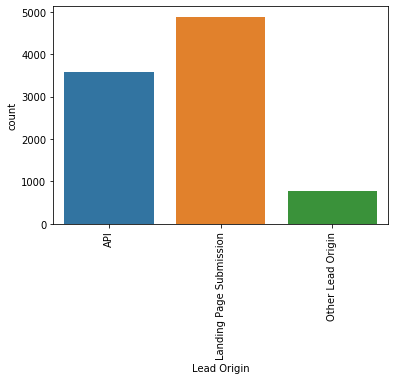

In [28]:
sns.countplot(leads_data['Lead Origin'])
plt.xticks(rotation = 90)
plt.show()

In [29]:
# checking the column 'Last Notable Activity': The last notable acitivity performed by the student.
leads_data['Last Notable Activity'].describe()

count         9240
unique          16
top       Modified
freq          3407
Name: Last Notable Activity, dtype: object

In [30]:
leads_data['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
View in browser link Clicked       1
Resubscribed to emails             1
Form Submitted on Website          1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

In [31]:
leads_data['Last Notable Activity'].value_counts(normalize=True)

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Email Received                  0.000108
View in browser link Clicked    0.000108
Resubscribed to emails          0.000108
Form Submitted on Website       0.000108
Approached upfront              0.000108
Name: Last Notable Activity, dtype: float64

In [32]:
leads_data['Last Notable Activity'] = leads_data['Last Notable Activity'].replace(['Email Marked Spam','Email Bounced',
     'Olark Chat Conversation','Unsubscribed', 'Unreachable', 'Had a Phone Conversation','Page Visited on Website',
     'Email Link Clicked','View in browser link Clicked', 'Approached upfront', 'Email Received', 'Resubscribed to emails',
                                             'Form Submitted on Website'], 'Other Notable Activity')

In [33]:
leads_data['Last Notable Activity'].value_counts(normalize=True)

Modified                  0.368723
Email Opened              0.305952
SMS Sent                  0.235065
Other Notable Activity    0.090260
Name: Last Notable Activity, dtype: float64

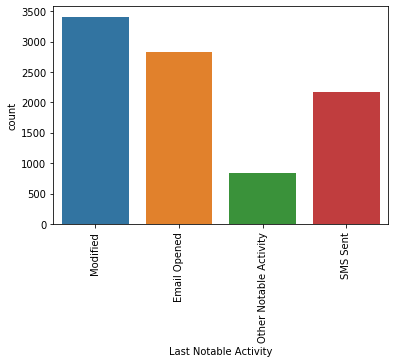

In [34]:
sns.countplot(leads_data['Last Notable Activity'])
plt.xticks(rotation = 90)
plt.show()

In [35]:
# columns 'Last Notable Activity' & 'Last Activity': Last activity performed by the customer. Includes Email Opened, Olark Chat 
# Conversation, etc. description are same only
leads_data = leads_data.drop('Last Activity', axis=1)
leads_data.shape

(9240, 13)

In [36]:
# Calculating the Missing Values % contribution in Dataframe
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Country                                   26.63
Specialization                            36.58
What is your current occupation           29.11
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

#### If in a row, more than 5 values are missing then that row is not giving much info to us.

In [37]:
# count the number of rows having > 5 missing values
len(leads_data[leads_data.isnull().sum(axis=1) > 5].index)

7

In [38]:
# 7 rows have more than 5 missing values
# calculate the percentage
100*(len(leads_data[leads_data.isnull().sum(axis=1) > 5].index) / len(leads_data.index))

0.07575757575757576

Thus, about 0.075% rows have more than 5 missing values. Let's remove these rows and count the number of missing values remaining.

In [39]:
# retaining the rows having <= 5 NaNs
leads_data = leads_data[leads_data.isnull().sum(axis=1) <= 5]

# look at the summary again
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.32
Converted                                  0.00
TotalVisits                                1.41
Total Time Spent on Website                0.00
Page Views Per Visit                       1.41
Country                                   26.58
Specialization                            36.53
What is your current occupation           29.12
City                                      39.66
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

### 2.3 Now we will take care of null values in each column one by one.

####  1. 'City' Column

In [40]:
# City: The city of the customer.
leads_data.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [41]:
leads_data.City.value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

In [42]:
leads_data.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

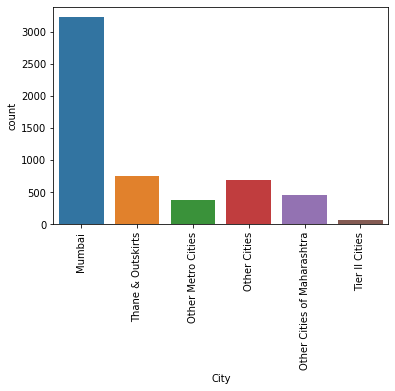

In [43]:
sns.countplot(leads_data.City)
plt.xticks(rotation = 90)
plt.show()

In [44]:
print(leads_data['City'].isnull().sum())

3662


Around 58% of the data is Mumbai so we can impute Mumbai in the missing values.

In [45]:
leads_data['City'] = leads_data['City'].replace(np.nan, 'Mumbai')
print(leads_data['City'].value_counts())

Mumbai                         6884
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


In [46]:
leads_data['City'].value_counts(normalize=True)

Mumbai                         0.745586
Thane & Outskirts              0.081447
Other Cities                   0.074299
Other Cities of Maharashtra    0.049496
Other Metro Cities             0.041157
Tier II Cities                 0.008015
Name: City, dtype: float64

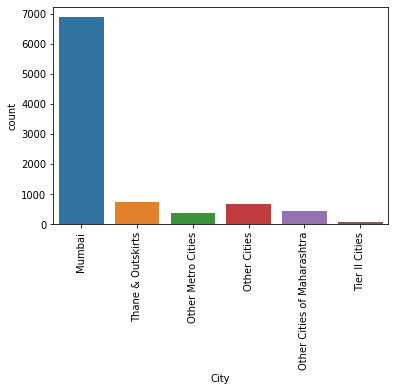

In [47]:
sns.countplot(leads_data.City)
plt.xticks(rotation = 90)
plt.show()

In [48]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.32
Converted                                  0.00
TotalVisits                                1.41
Total Time Spent on Website                0.00
Page Views Per Visit                       1.41
Country                                   26.58
Specialization                            36.53
What is your current occupation           29.12
City                                       0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

####  2. 'Specailization' Column

In [49]:
# Specailization: The industry domain in which the customer worked before. Includes the level 'Select Specialization' which
# means the customer had not selected this option while filling the form.
leads_data.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [50]:
leads_data.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [51]:
leads_data.Specialization.value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Media and Advertising                0.034642
Travel and Tourism                   0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [52]:
print(leads_data['Specialization'].isnull().sum())

3373


It maybe the case that lead has not entered any specialization if his/her option is not availabe on the list, may not have
any specialization or is a student.

Creating a new category `Unknown`consisting on NULL/Select values for the field: `specialization`

In [53]:
leads_data['Specialization'].fillna("Unknown", inplace = True)

In [54]:
leads_data['Specialization'] = leads_data['Specialization'].replace(['E-Business','Services Excellence'],'Other Specialization')

In [55]:
leads_data.Specialization.value_counts(normalize=True)

Unknown                              0.365320
Finance Management                   0.105708
Human Resource Management            0.091844
Marketing Management                 0.090761
Operations Management                0.054479
Business Administration              0.043648
IT Projects Management               0.039640
Supply Chain Management              0.037799
Banking, Investment And Insurance    0.036608
Travel and Tourism                   0.021986
Media and Advertising                0.021986
International Business               0.019279
Healthcare Management                0.017221
Hospitality Management               0.012347
E-COMMERCE                           0.012130
Retail Management                    0.010831
Other Specialization                 0.010506
Rural and Agribusiness               0.007906
Name: Specialization, dtype: float64

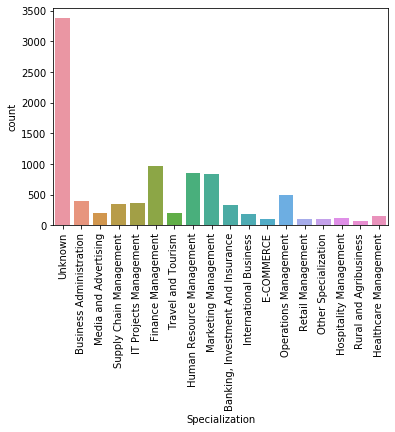

In [56]:
sns.countplot(leads_data['Specialization'])
plt.xticks(rotation = 90)
plt.show()

In [57]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.32
Converted                                  0.00
TotalVisits                                1.41
Total Time Spent on Website                0.00
Page Views Per Visit                       1.41
Country                                   26.58
Specialization                             0.00
What is your current occupation           29.12
City                                       0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

####  3. 'What is your current occupation ' Column

In [58]:
# What is your current occupation: Indicates whether the customer is a student, umemployed or employed.
leads_data['What is your current occupation'].describe()

count           6544
unique             6
top       Unemployed
freq            5594
Name: What is your current occupation, dtype: object

In [59]:
leads_data['What is your current occupation'].value_counts()

Unemployed              5594
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [60]:
leads_data['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854829
Working Professional    0.107885
Student                 0.032090
Other                   0.002445
Housewife               0.001528
Businessman             0.001222
Name: What is your current occupation, dtype: float64

In [61]:
leads_data['What is your current occupation'].isnull().sum()

2689

86% entries are of Unemployed so we can impute "Unemployed" in it.

In [62]:
leads_data['What is your current occupation']= leads_data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [63]:
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].replace(['Other', 'Student',
                                            'Housewife','Businessman'], 'Other occupation')

In [64]:
leads_data['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.897108
Working Professional    0.076465
Other occupation        0.026427
Name: What is your current occupation, dtype: float64

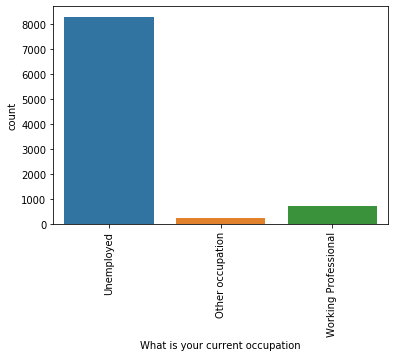

In [65]:
sns.countplot(leads_data['What is your current occupation'])
plt.xticks(rotation = 90)
plt.show()

In [66]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.32
Converted                                  0.00
TotalVisits                                1.41
Total Time Spent on Website                0.00
Page Views Per Visit                       1.41
Country                                   26.58
Specialization                             0.00
What is your current occupation            0.00
City                                       0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

####  4. 'Country' Column

In [67]:
# Country: The country of the customer.
leads_data.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [68]:
leads_data.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Germany                    4
South Africa               4
Kuwait                     4
Nigeria                    4
Canada                     4
Sweden                     3
Uganda                     2
Italy                      2
Ghana                      2
Philippines                2
Netherlands                2
Bangladesh                 2
Belgium                    2
China                      2
Asia/Pacific Region        2
Russia                     1
Indonesia                  1
Denmark                    1
Liberia                    1
Vietnam                    1
Tanzania                   1
Kenya         

In [69]:
leads_data.Country.value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Bahrain                 0.001033
Hong Kong               0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
Germany                 0.000590
South Africa            0.000590
Kuwait                  0.000590
Nigeria                 0.000590
Canada                  0.000590
Sweden                  0.000443
Uganda                  0.000295
Italy                   0.000295
Ghana                   0.000295
Philippines             0.000295
Netherlands             0.000295
Bangladesh              0.000295
Belgium                 0.000295
China                   0.000295
Asia/Pacific Region     0.000295
Russia                  0.000148
Indonesia               0.000148
Denmark   

In [70]:
leads_data.Country.isnull().sum()

2454

96% Country is India for most values so let's impute the same in missing values.

In [71]:
leads_data['Country'] = leads_data['Country'].replace(np.nan, 'India') 

In [72]:
def correction(x):
    if x in ['India']:
        x= 'India'
    else:
        x= 'Outside India'
    return(x)

In [73]:
leads_data['Country'] = leads_data['Country'].apply(lambda x: correction(x))
leads_data['Country'].value_counts()

India            8946
Outside India     287
Name: Country, dtype: int64

In [74]:
leads_data.Country.value_counts(normalize=True)

India            0.968916
Outside India    0.031084
Name: Country, dtype: float64

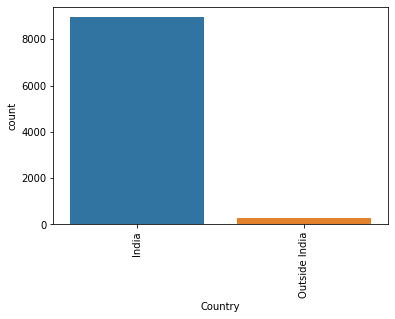

In [75]:
sns.countplot(leads_data['Country'])
plt.xticks(rotation = 90)
plt.show()

In [76]:
# Deleting the column 'Country' as it is highly skewed column.
leads_data = leads_data.drop('Country', axis=1)
leads_data.shape

(9233, 12)

In [77]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.32
Converted                                 0.00
TotalVisits                               1.41
Total Time Spent on Website               0.00
Page Views Per Visit                      1.41
Specialization                            0.00
What is your current occupation           0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

Last Activity is Email Opened for most values so let's impute the same in missing values.

####  5. 'Lead Source' Column

In [78]:
# Lead Source: The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
leads_data['Lead Source'].describe()

count       9203
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

In [79]:
leads_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1754
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
WeLearn                 1
welearnblog_Home        1
NC_EDM                  1
youtubechannel          1
Pay per Click Ads       1
blog                    1
testone                 1
Name: Lead Source, dtype: int64

In [80]:
leads_data['Lead Source'].value_counts(normalize=True)

Google               0.311638
Direct Traffic       0.276323
Olark Chat           0.190590
Organic Search       0.125394
Reference            0.058025
Welingak Website     0.015430
Referral Sites       0.013583
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Live Chat            0.000217
Social Media         0.000217
Press_Release        0.000217
WeLearn              0.000109
welearnblog_Home     0.000109
NC_EDM               0.000109
youtubechannel       0.000109
Pay per Click Ads    0.000109
blog                 0.000109
testone              0.000109
Name: Lead Source, dtype: float64

In [81]:
leads_data['Lead Source'].isnull().sum()

30

Lead Source is Google for most values so let's impute the same in missing values.

In [82]:
leads_data['Lead Source']= leads_data['Lead Source'].replace(np.nan, 'Google')

In [83]:
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['google'], 'Google')
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 
         'Press_Release','Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'Facebook', 'youtubechannel', 
                                'welearnblog_Home'], 'Others')

In [84]:
leads_data['Lead Source'].value_counts(normalize=True)

Google              0.314416
Direct Traffic      0.275425
Olark Chat          0.189971
Organic Search      0.124986
Reference           0.057836
Welingak Website    0.015380
Referral Sites      0.013538
Others              0.008448
Name: Lead Source, dtype: float64

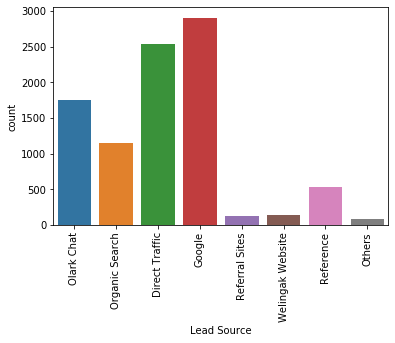

In [85]:
sns.countplot(leads_data['Lead Source'])
plt.xticks(rotation = 90)
plt.show()

In [86]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.00
Converted                                 0.00
TotalVisits                               1.41
Total Time Spent on Website               0.00
Page Views Per Visit                      1.41
Specialization                            0.00
What is your current occupation           0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

####  6. 'TotalVisits' & 'Page Views Per Visit' Column

-  #### Imputing with Median values because the continuous variables have outliers

In [87]:
leads_data['TotalVisits'].replace(np.NaN, leads_data['TotalVisits'].median(), inplace =True)
leads_data['Page Views Per Visit'].replace(np.NaN, leads_data['Page Views Per Visit'].median(), inplace =True)

In [88]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

### Checking the number of retained rows

In [89]:
# Write your code for checking number of retained rows here
leads_data.shape

(9233, 12)

In [90]:
# checking the %age for rows left 
(9233/9240)*100

99.92424242424242

We still have around 99.9% of the rows

#### Now Data is clean and we can start with the analysis part

### Step 3: Visualization of the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where i will also identify if some predictors directly have a strong association with the outcome variable

#### Checking the coorelations between the variables

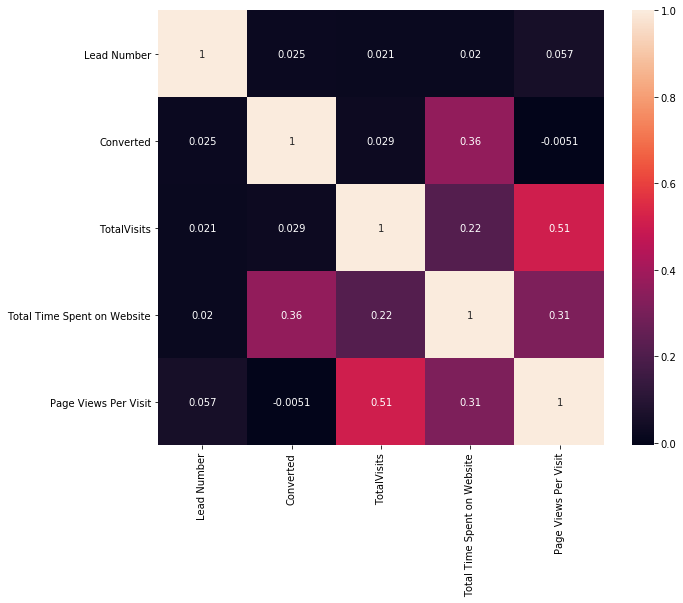

In [91]:
plt.figure(figsize=(10,8))
sns.heatmap(leads_data.corr(), annot= True)
plt.show()

## 3.1  Exploratory Data Analysis
### 3.1.1 Univariate Analysis

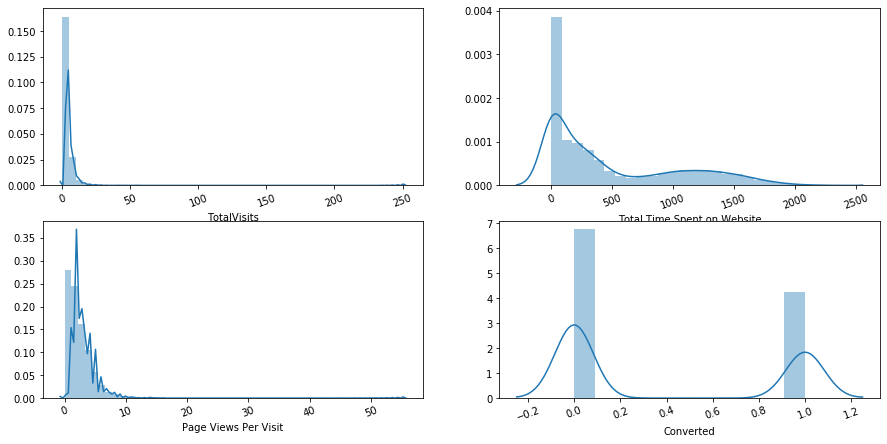

In [92]:
plt.figure(figsize=(15,15))
features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']
for i in enumerate(features): 
    ax = plt.subplot(4, 2, i[0]+1)
    sns.distplot(leads_data[i[1]])
    plt.xticks(rotation = 20)

Performing univariate analysis by comparing the target variable('Converted') across categories of categorical variables.

In [93]:
# converted count
leads_data.Converted.value_counts(normalize=True)

0    0.614535
1    0.385465
Name: Converted, dtype: float64

In [94]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
Converted = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
Converted

38.54651792483483

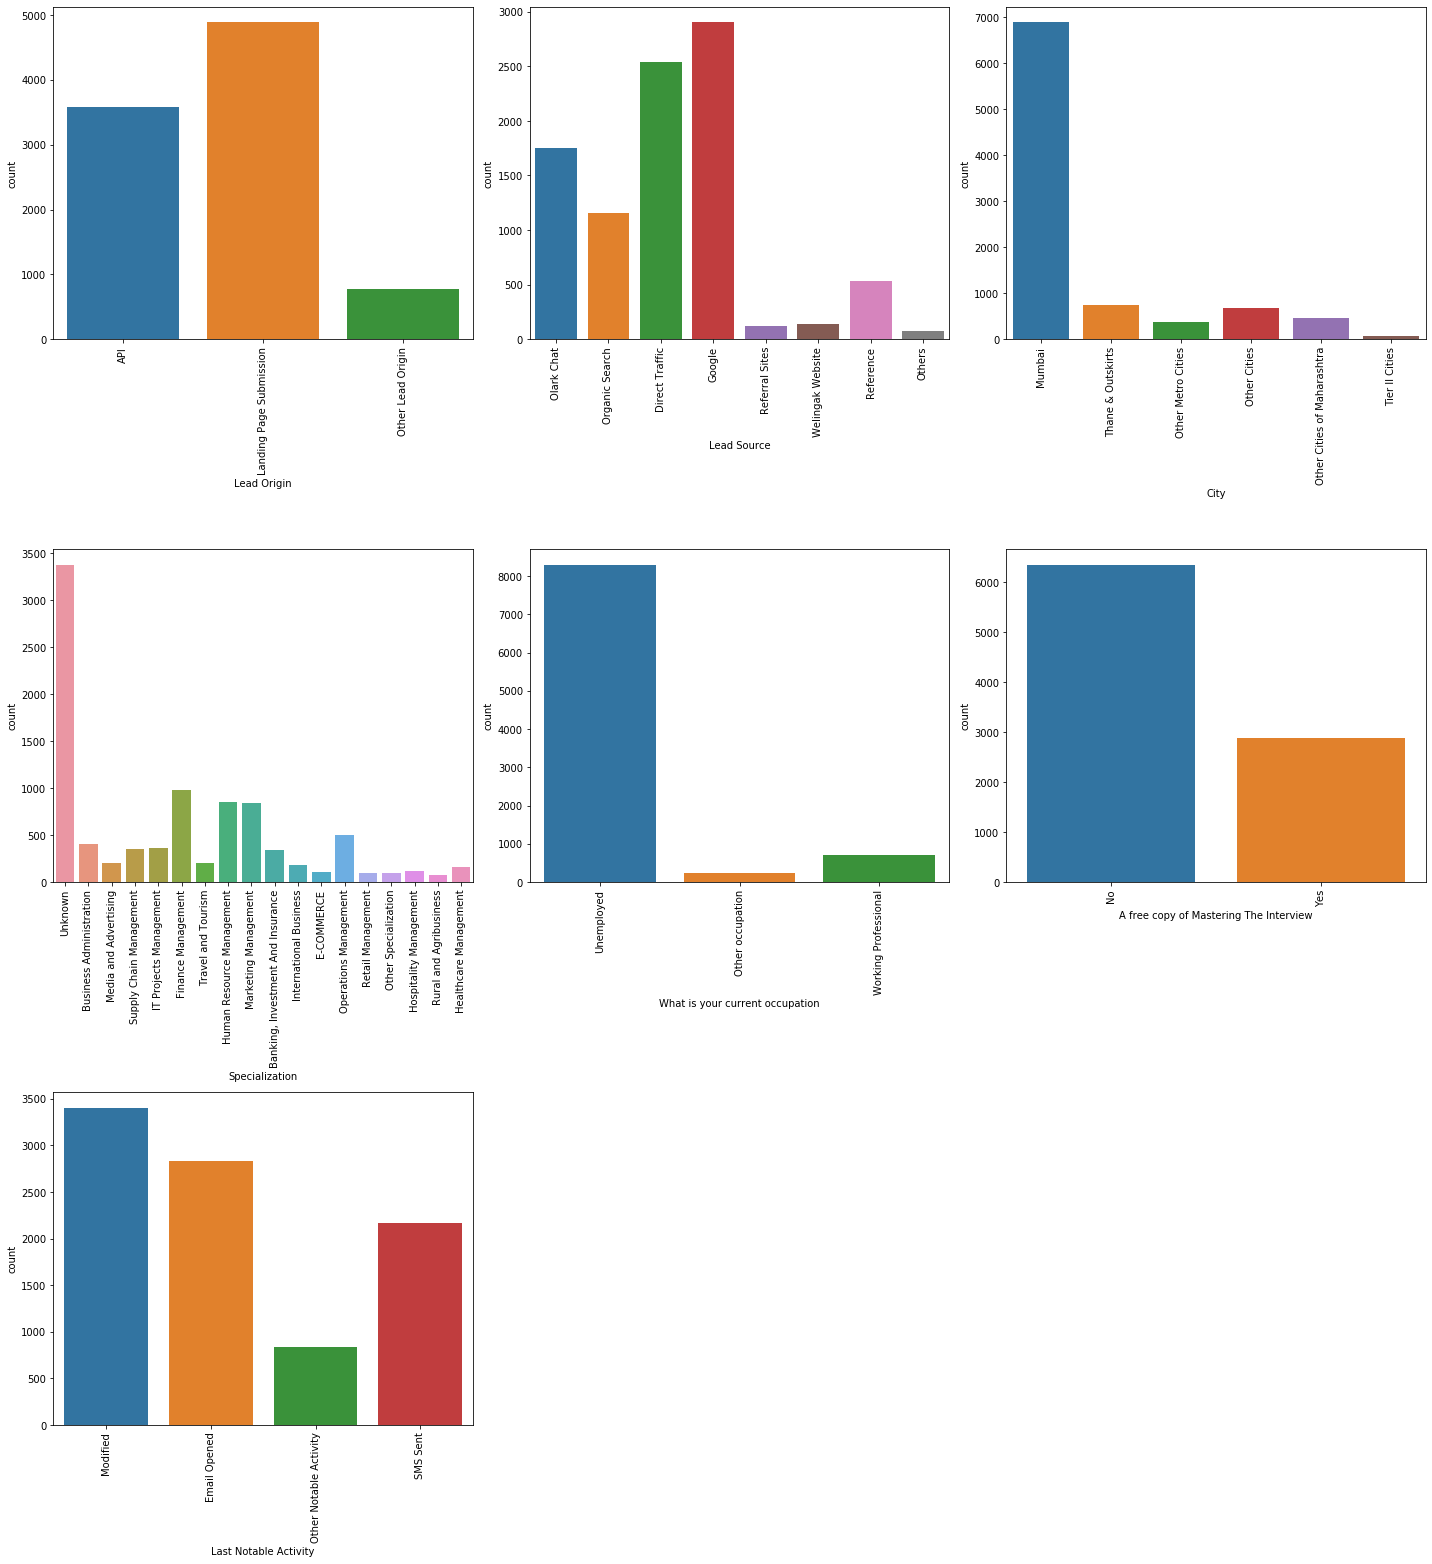

In [95]:
fig= plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.countplot(leads_data['Lead Origin'])
plt.xticks(rotation = 90)

plt.subplot(3,3,2)
sns.countplot(leads_data["Lead Source"])
plt.xticks(rotation = 90)

plt.subplot(3,3,3)
sns.countplot(leads_data["City"])
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(3,3,4)
sns.countplot(leads_data["Specialization"])
plt.xticks(rotation = 90)

plt.subplot(3,3,5)
sns.countplot(leads_data["What is your current occupation"])
plt.xticks(rotation = 90)

plt.subplot(3,3,6)
sns.countplot(leads_data["A free copy of Mastering The Interview"])
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(3,3,7)
sns.countplot(leads_data["Last Notable Activity"])
plt.xticks(rotation = 90)
plt.show()

#### Inference:
1) Lead Origin
1. Most of the Leads are originated from API and Landing Page Submission.

2) Lead Source
1. Google, Direct traffic, olark chat and organic search generates maximum number of leads.

3) City
1. Mumbai city generates maximum number of leads.

4) Specialization
1. Unknown, Finance Management, Human Resource Management, Marketing Management, Operations Management etc. generates maximum number of leads.

5) What is your current occupation
1. Unemployed generates maximum number of leads.

6) A free copy of Mastering The Interview
1. Most of the people have selected No.

7) Last Notable Activity
1. Most of the lead have their Email opened, SMS Sent and modified as their last activity.

### 3.1.2  Multivariate Analysis

#### Let's make a pairplot of all the numeric variables

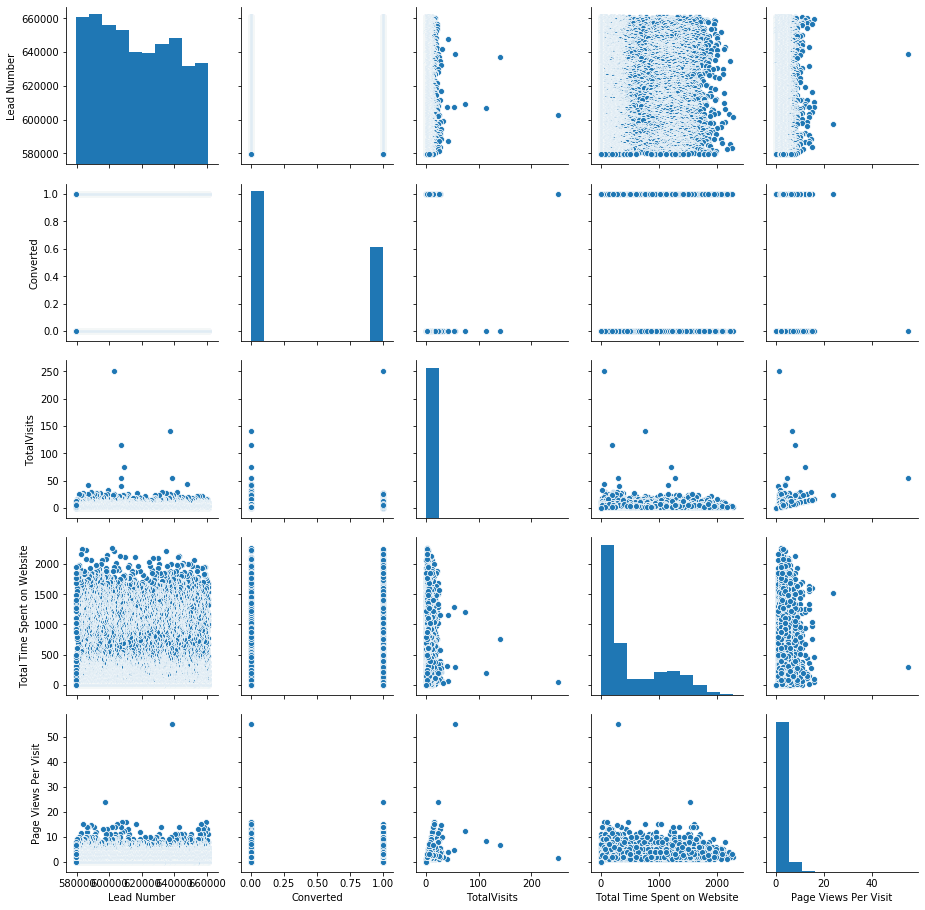

In [96]:
num_var=leads_data[['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]
sns.pairplot(num_var)
plt.show()

### 3.2.3 Visualising Categorical- Categorical Variables

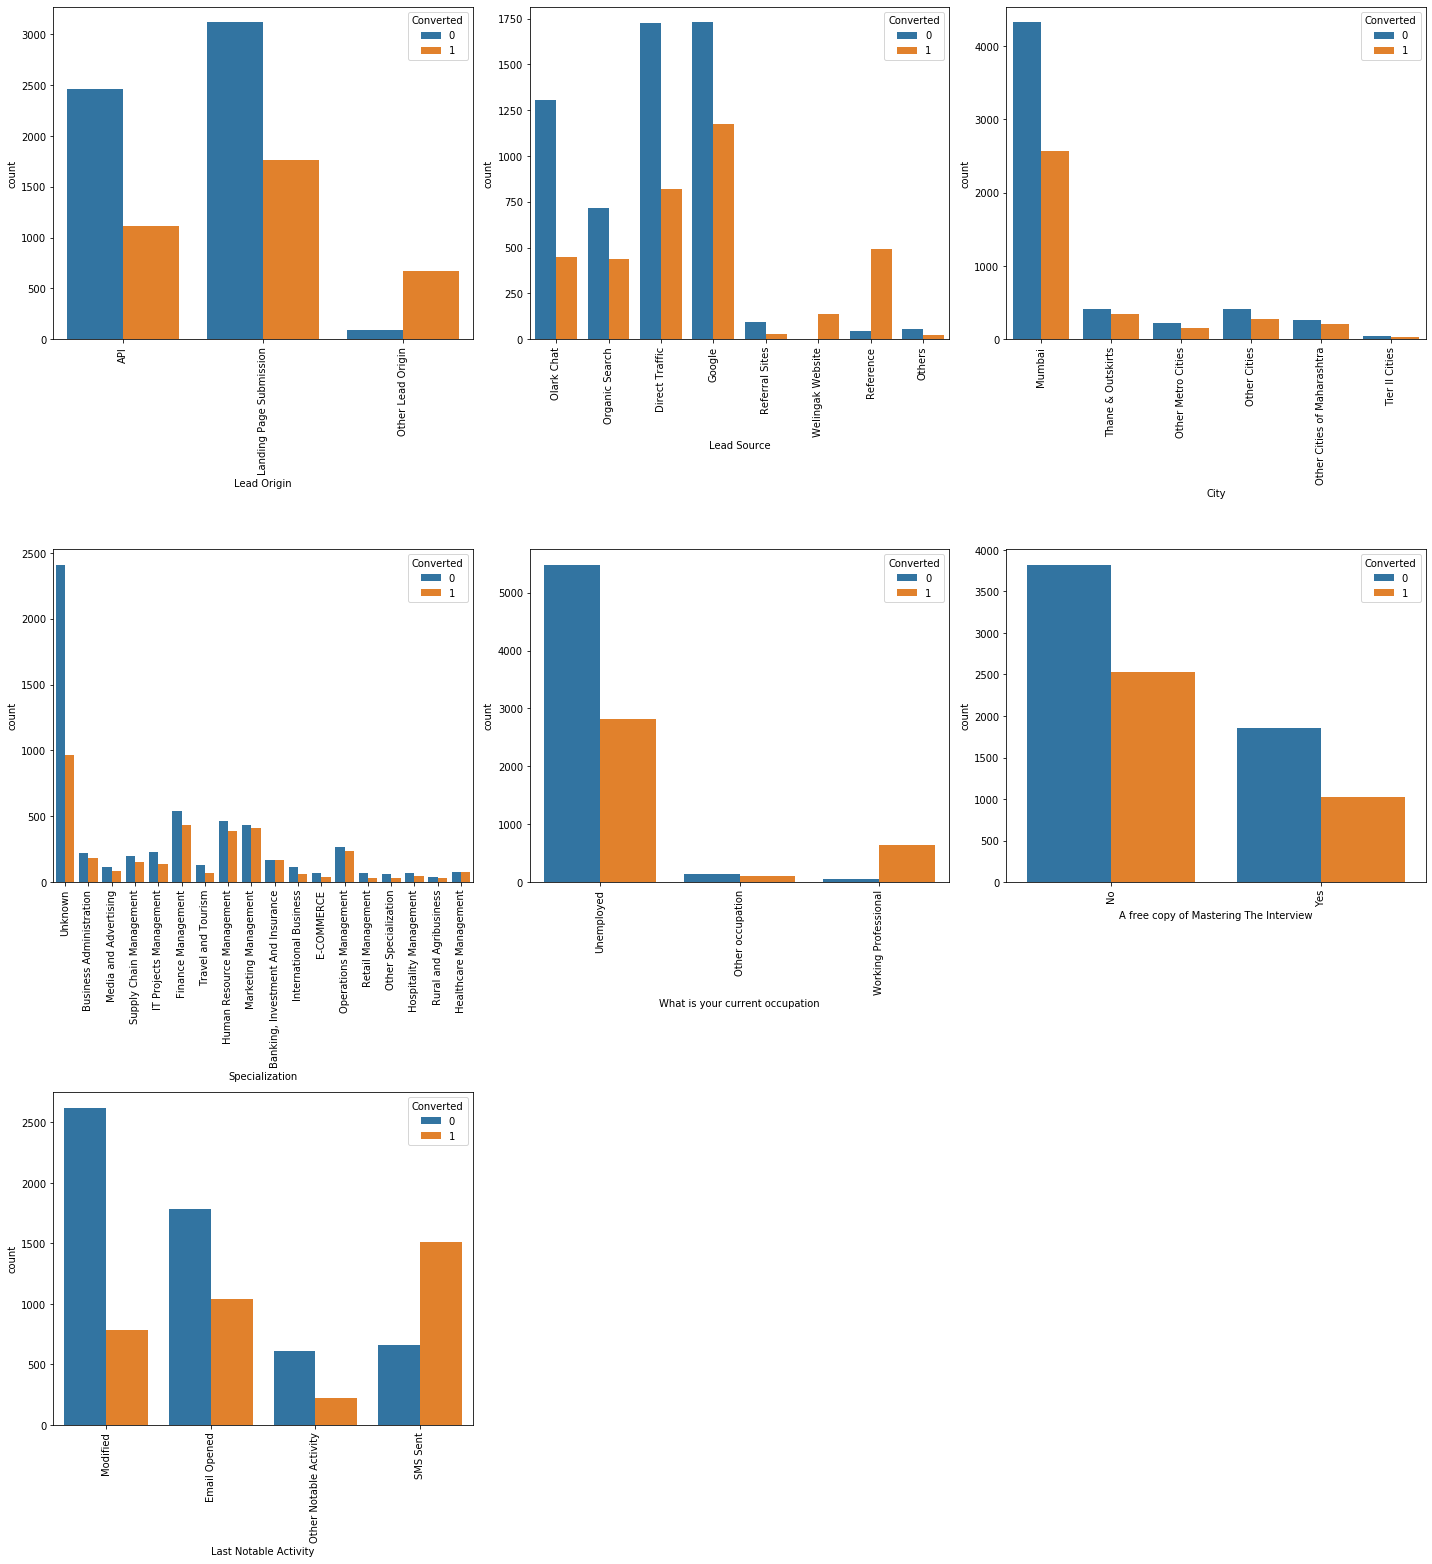

In [97]:
fig= plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)

plt.subplot(3,3,2)
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)

plt.subplot(3,3,3)
sns.countplot(x = "City", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(3,3,4)
sns.countplot(x = "Specialization", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)

plt.subplot(3,3,5)
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)

plt.subplot(3,3,6)
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(3,3,7)
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)
plt.show()

#### Inference:
1) Lead Origin
1. API and Landing Page Submission have more conversion rate but count of lead originated from them are considerable.
2. Other Lead Origin has more conversion rate but count of lead are not very high.
3. Lead Import are very less in count.
- To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Other Lead Origin.

2) Lead Source
1. Google and Direct traffic generates maximum number of leads.
2. Conversion Rate of reference leads and leads through welingak website is high.
- To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

3) City
1. Mumbai city generates maximum number of leads.
- To improve overall lead conversion rate, focus should be on improving lead converion of Thane & Outskirts, Other Cities, Other Cities of Maharashtra, Other Metro Cities  

4) Specialization
1. Unknown, Finance Management and Marketing Management generates maximum number of leads.
2. Healthcare Management conversion rate is high.
- To improve overall lead conversion rate, focus should be on improving lead converion of Human Resource Management, Operations Management, Business Administration etc

5) What is your current occupation
1. Unemployed generates maximum number of leads.
2. Working professional conversion rate is high.
- To improve overall lead conversion rate, focus should be on improving lead converion of Unemployed, other occupations

6) A free copy of Mastering The Interview
1. Yes generates maximum number of leads
- To improve overall lead conversion rate, focus should be on improving lead converion of Yes and No

7) Last Notable Activity
1. SMS Sent generates maximum number of leads and conversion rate is also high.
2. Most of the lead have their Email opened and modified as their last activity.
- To improve overall lead conversion rate, focus should be on improving lead converion of Email Opened, Modified 

### 3.2.4 Visualising Numerical - Categorical Variables

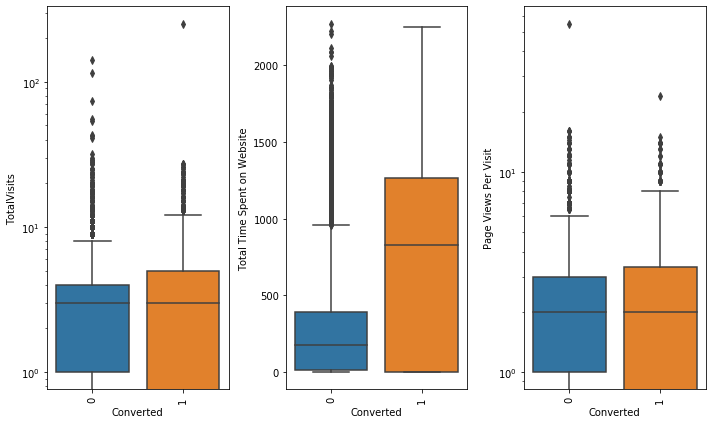

In [98]:
fig= plt.figure(figsize=(10, 6))
plt.subplot(1,3,1)
sns.boxplot(y = "TotalVisits", x= "Converted", data = leads_data)
plt.yscale('log')
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.boxplot(y = "Total Time Spent on Website", x = "Converted", data = leads_data)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(1,3,3)
sns.boxplot(y = "Page Views Per Visit", x = "Converted", data = leads_data)
plt.yscale('log')
plt.xticks(rotation = 90)
fig.tight_layout()
plt.show()

### Inference
1) TotalVisits
1. Median for converted and not converted leads are the same.
2. Nothng conclusive can be said on the basis of Total Visits.

2) Total Time Spent on Website
1. Leads spending more time on the weblise are more likely to be converted.
2. Website should be made more engaging to make leads spend more time.

3) Page Views Per Visit
1. Median for converted and not converted leads are the same.
2. Nothing can be said specifically for lead conversion from Page Views Per Visit

### Step 4: Preparing the data for modelling

#### 4.1 Converting some binary variables (Yes/No) to 0/1

In [99]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_data[varlist] = leads_data[varlist].apply(binary_map)
leads_data

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.00,Unknown,Unemployed,Mumbai,0,Modified
1,660728,API,Organic Search,0,5.0,674,2.50,Unknown,Unemployed,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Business Administration,Other occupation,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Media and Advertising,Unemployed,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.00,Unknown,Unemployed,Mumbai,0,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,Landing Page Submission,Direct Traffic,1,8.0,1845,2.67,IT Projects Management,Unemployed,Mumbai,0,Other Notable Activity
9236,579546,Landing Page Submission,Direct Traffic,0,2.0,238,2.00,Media and Advertising,Unemployed,Mumbai,1,SMS Sent
9237,579545,Landing Page Submission,Direct Traffic,0,2.0,199,2.00,Business Administration,Unemployed,Mumbai,1,SMS Sent
9238,579538,Landing Page Submission,Google,1,3.0,499,3.00,Human Resource Management,Unemployed,Other Metro Cities,0,SMS Sent


In [100]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads_data[['City']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads_data, dummy1], axis=1)
leads.shape

(9233, 17)

#### 4.2 For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [101]:
# Creating dummy variables for the remaining categorical variables and 
# dropping the level called 'Unknown' or 'Others' which represents null/select values and least contributed columns.

# Creating dummy variables for the variable 'Lead Origin'
lo = pd.get_dummies(leads['Lead Origin'], prefix='Lead Origin')
# Dropping the level called 'Other' which represents binning values
lo1 = lo.drop(['Lead Origin_Other Lead Origin'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,lo1], axis=1)

# Creating dummy variables for the variable 'Last Notable Activity'
lna = pd.get_dummies(leads['Last Notable Activity'], prefix='Last Notable Activity')
# Dropping the level called 'Other' which represents binning values
lna1 = lna.drop(['Last Notable Activity_Other Notable Activity'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,lna1], axis=1)

# Creating dummy variables for the variable 'Specialization'
s = pd.get_dummies(leads['Specialization'], prefix='Specialization')
# Dropping the level called 'Unknown' which represents null/select values
s1 = s.drop(['Specialization_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,s1], axis=1)

# Creating dummy variables for the variable 'What is your current occupation'
wo = pd.get_dummies(leads['What is your current occupation'], prefix='What is your current occupation')
# Dropping the level called 'Other' which represents binning values
wo1 = wo.drop(['What is your current occupation_Other occupation'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,wo1], axis=1)

# Creating dummy variables for the variable 'Lead Profile'
ls = pd.get_dummies(leads['Lead Source'], prefix='Lead Source')
# Dropping the level called 'Others' which represents binning values
ls1 = ls.drop(['Lead Source_Others'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ls1], axis=1)

leads.shape

(9233, 48)

#### 4.3 Dropping the repeated variables

In [102]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Origin', 'What is your current occupation', 'Specialization', 'City','Lead Source',
                    'Last Notable Activity'], 1)
leads.shape

(9233, 42)

In [103]:
leads

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,...,Specialization_Travel and Tourism,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
0,660737,0,0.0,0,0.00,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,660728,0,5.0,674,2.50,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,660727,1,2.0,1532,2.00,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,660719,0,1.0,305,1.00,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,660681,1,2.0,1428,1.00,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,1,8.0,1845,2.67,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
9236,579546,0,2.0,238,2.00,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
9237,579545,0,2.0,199,2.00,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
9238,579538,1,3.0,499,3.00,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0


In [104]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9239
Data columns (total 42 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9233 non-null   int64  
 1   Converted                                             9233 non-null   int64  
 2   TotalVisits                                           9233 non-null   float64
 3   Total Time Spent on Website                           9233 non-null   int64  
 4   Page Views Per Visit                                  9233 non-null   float64
 5   A free copy of Mastering The Interview                9233 non-null   int64  
 6   City_Other Cities                                     9233 non-null   uint8  
 7   City_Other Cities of Maharashtra                      9233 non-null   uint8  
 8   City_Other Metro Cities                               9233

Now you can see that you have all variables as numeric.

#### 4.4 Checking for Outliers

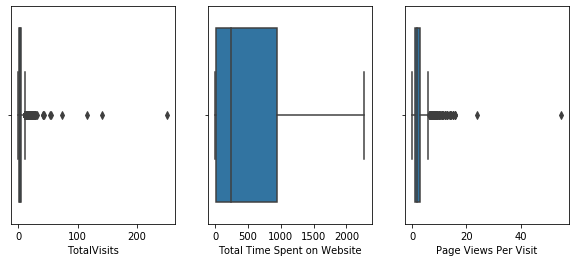

In [105]:
plt.figure(figsize=(10, 4))
plt.subplot(1,3,1)
sns.boxplot(leads['TotalVisits'])
plt.subplot(1,3,2)
sns.boxplot(leads['Total Time Spent on Website'])
plt.subplot(1,3,3)
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

From the blox plot it is clear that 'TotalVisits', 'Page Views Per Visit' columns have outliers whereas 'Total Time Spent on Website' dont have outliers.

In [106]:
# Checking for outliers in the continuous variables
num_leads = leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

In [107]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9233.000000,9233.000000,9233.000000
mean,3.438969,487.691541,2.357711
std,4.820835,548.088102,2.146572
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.680000,9.000000


From the distribution shown above, we can see that there are outliers in our data. The numbers are not gradually increasing in two columns('TotalVisits', 'Page Views Per Visit').

In [108]:
# removing (statistical) outliers
# outlier treatment for TotalVisits
Q1 = leads['TotalVisits'].quantile(0.01)
Q3 = leads['TotalVisits'].quantile(0.99)
IQR = Q3 - Q1
leads=leads[(leads['TotalVisits'] >= Q1 - 1.5*IQR) & (leads['TotalVisits'] <= Q3 + 1.5*IQR)]

# outlier treatment for Page Views Per Visit
Q1 = leads['Page Views Per Visit'].quantile(0.01)
Q3 = leads['Page Views Per Visit'].quantile(0.99)
IQR = Q3 - Q1
leads=leads[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

leads.shape

(9225, 42)

### 4.5 Test-Train Split

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
# Putting feature variable to X
X = leads.drop(['Converted', 'Lead Number'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Origin_API,...,Specialization_Travel and Tourism,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
0,0.0,0,0.0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1.0,305,1.0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [111]:
# Putting response variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [112]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 4.6  Feature Scaling

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(
                                X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Origin_API,...,Specialization_Travel and Tourism,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
1052,-0.106853,1.759696,0.302940,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
8706,-0.999803,-0.888141,-1.140361,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4876,0.488446,-0.722081,0.062390,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
6157,0.786096,1.062608,1.746240,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
5217,-0.106853,0.159315,-0.418711,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [115]:
### Checking the Converted Rate
Convert = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Convert

38.55826558265583

We have almost 39% converted rate

### 4.7 Looking at Correlations

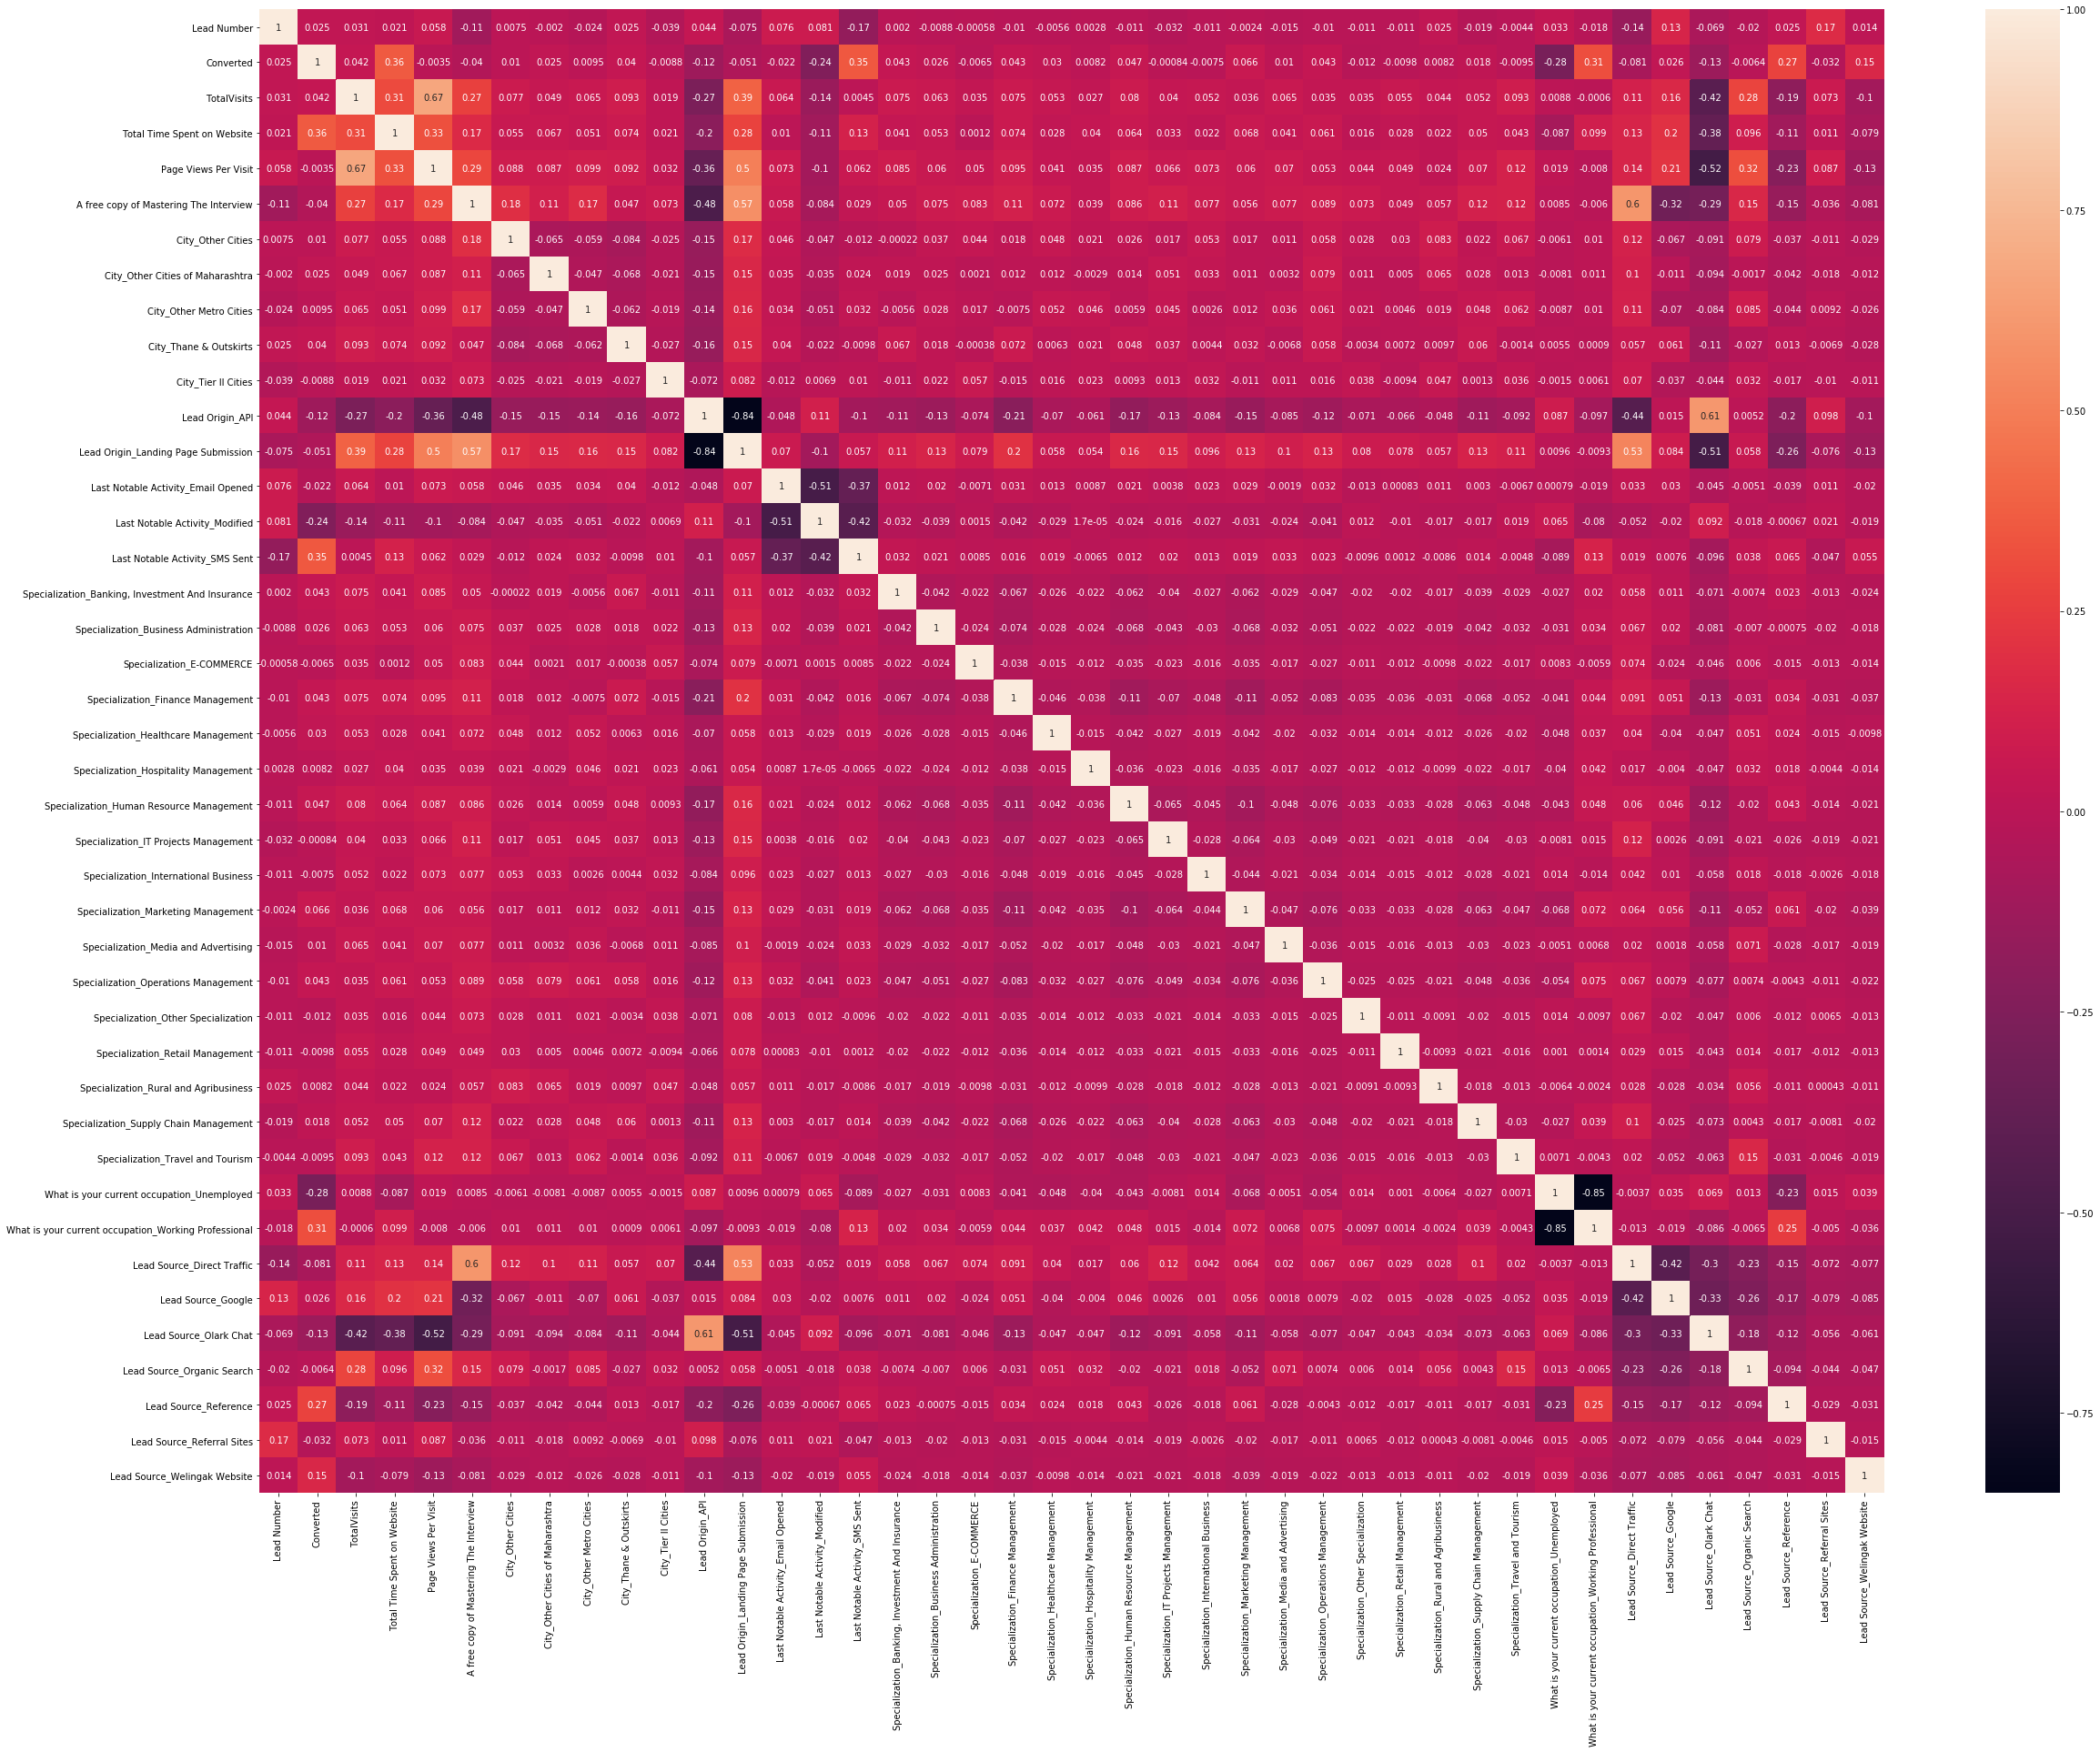

In [116]:
# Let's see the correlation matrix 
plt.figure(figsize = (40,30))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

#### Dropping highly correlated dummy variables

In [117]:
# dropping highly correlated dummy variables
X_test = X_test.drop(['Lead Origin_API','What is your current occupation_Unemployed'], 1)
X_train = X_train.drop(['Lead Origin_API','What is your current occupation_Unemployed'], 1)

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

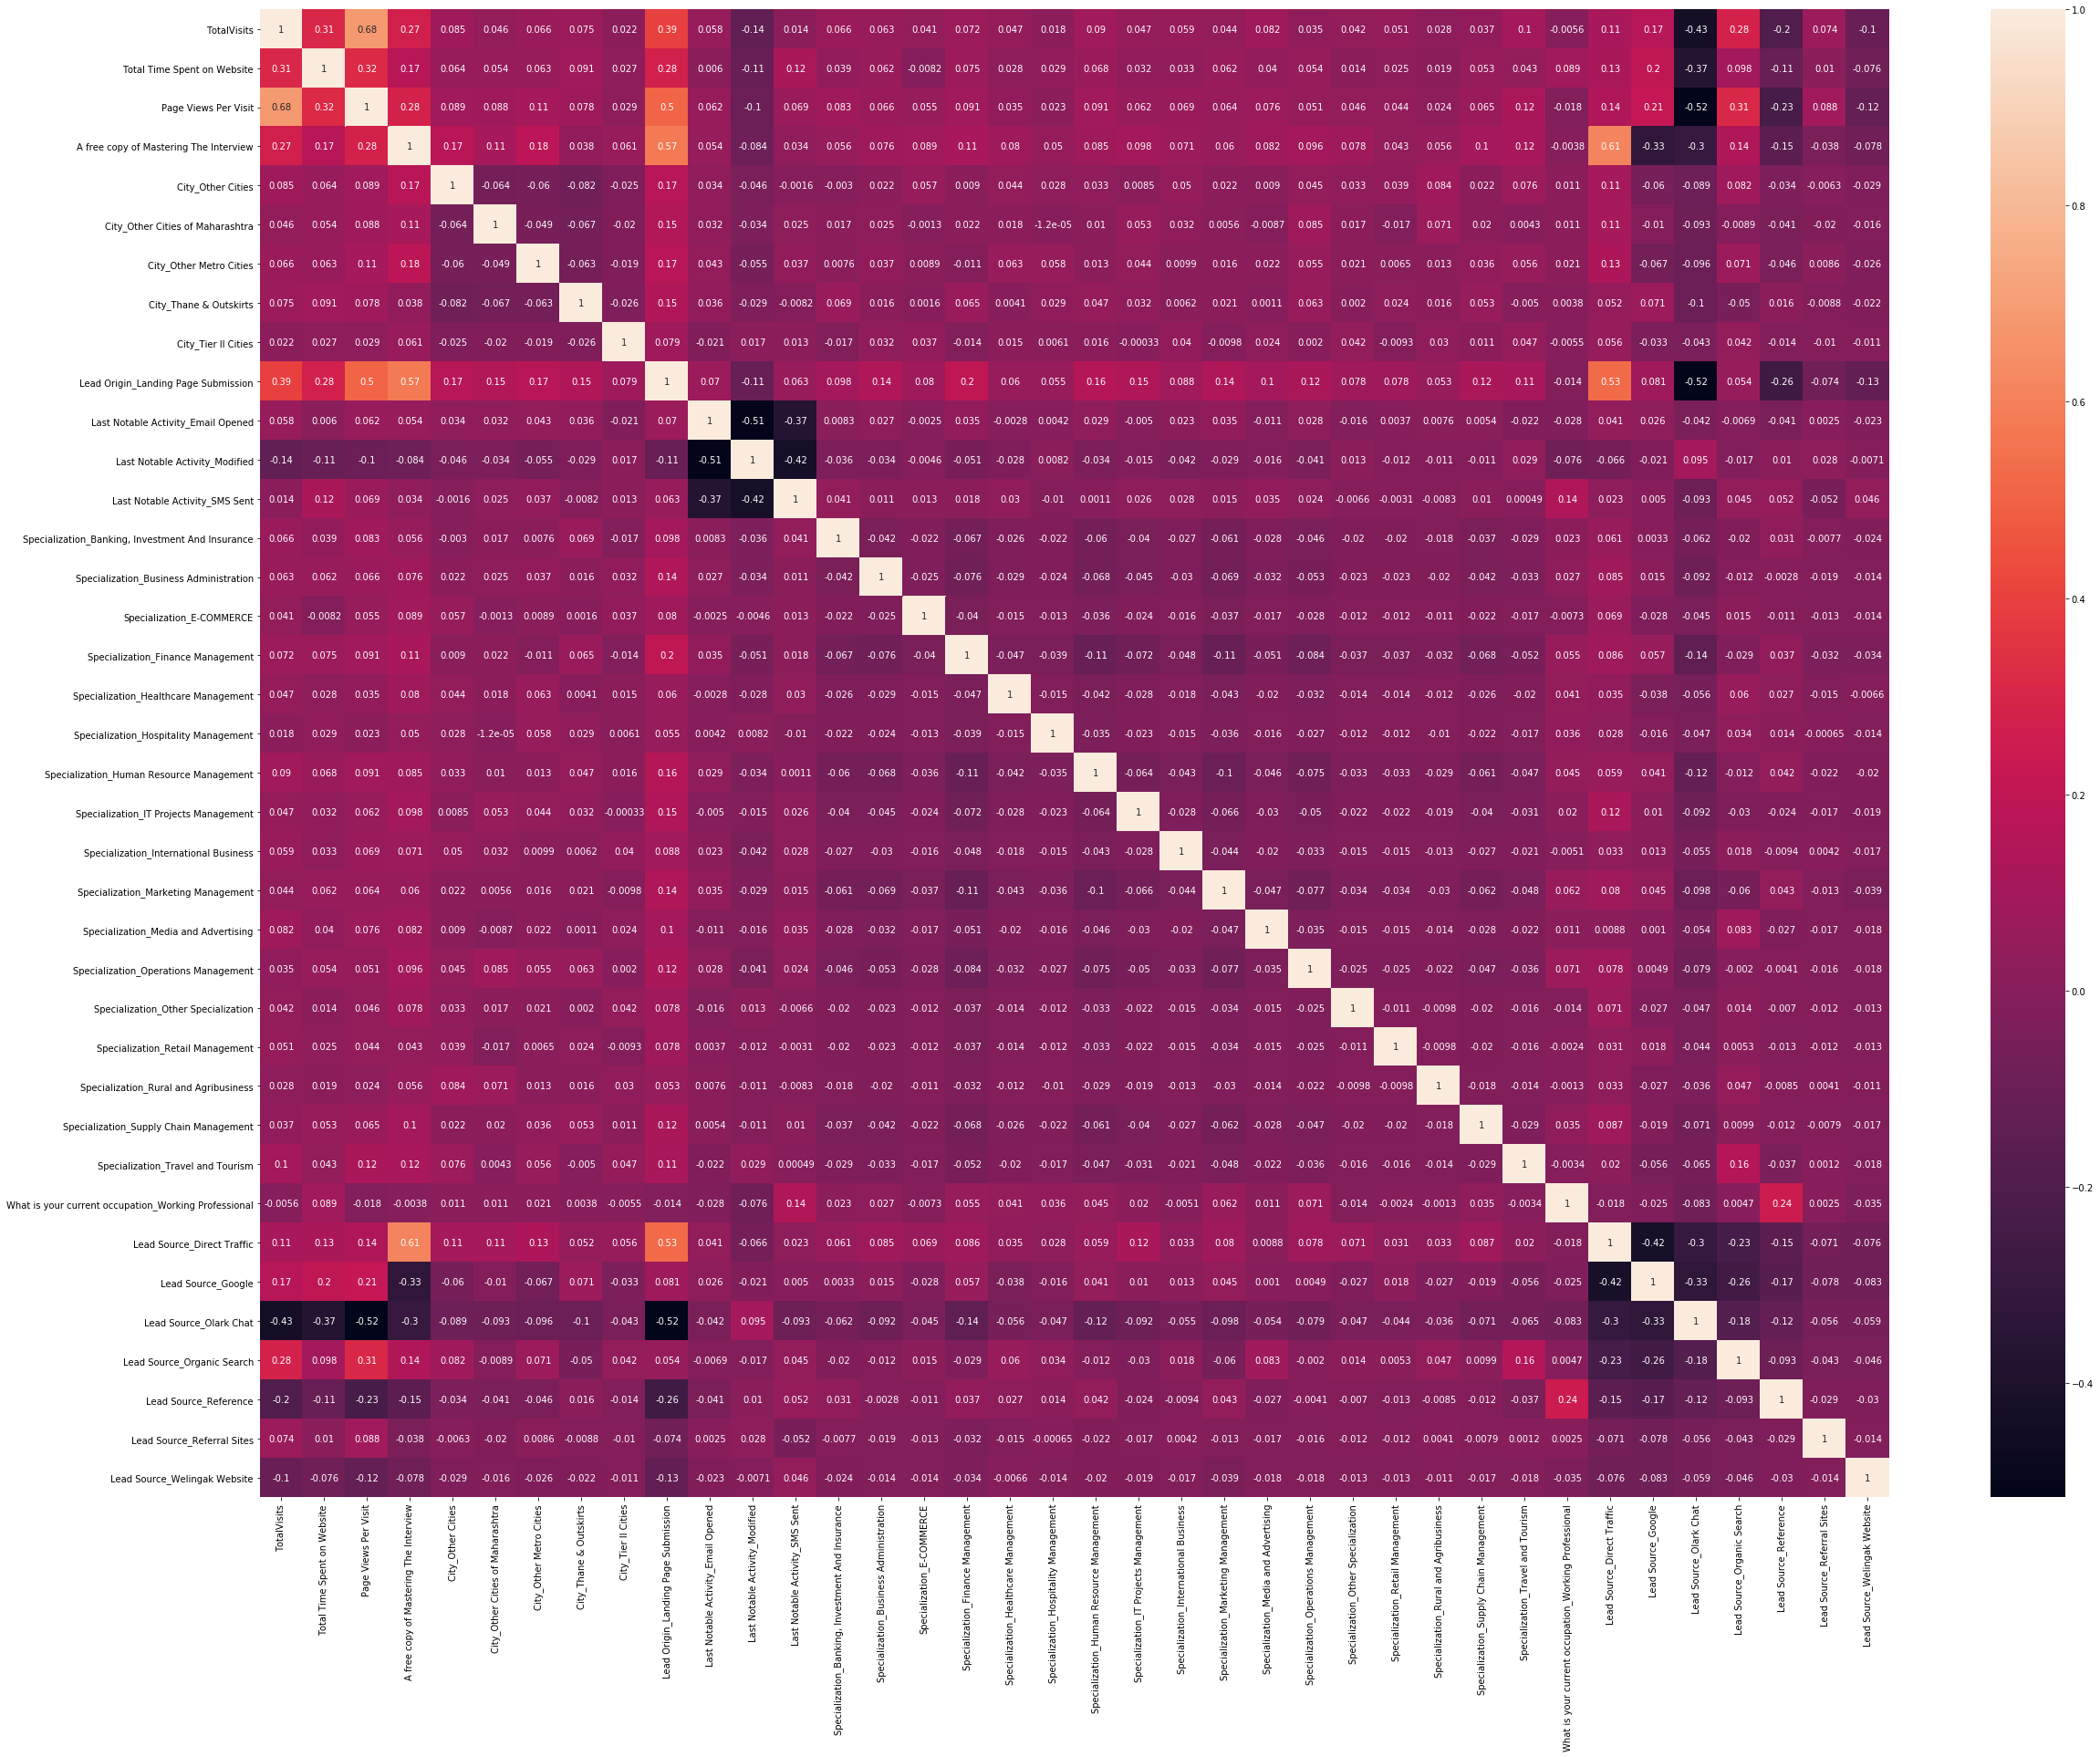

In [118]:
plt.figure(figsize = (40,30))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Step 5: Modeling
Let's start by splitting our data into a training set and a test set.

#### 5.1 Running Your First Training Model

In [119]:
import statsmodels.api as sm

In [120]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6457
Model:                            GLM   Df Residuals:                     6418
Model Family:                Binomial   Df Model:                           38
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2762.6
Date:                Sun, 31 May 2020   Deviance:                       5525.2
Time:                        15:20:34   Pearson chi2:                 6.67e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3754      0.378     -3.636      0.000      -2.117      -0.634
TotalVisits                                              0.2062      0.045      4.557      0.000       0.117       0.295
Total Time Spent on Website                              1.0703      0.039     27.315      0.000       0.993       1.147
Page Views Per Visit                                    -0.2287      0.053     -4.345      0.000      -0.332      -0.126
A free copy of Mastering The Interview                  -0.1585      0.107     -1.483      0.138      -0.368       0.051
City_Other Cities                                        0.1279      0.134      0.953      0.341      -0.135       0.391
City_Other Cities of Maharashtra                        -0.0223      0.159     -0.140      0.889      -0.335       0.290
City_Other Metro Cities                                  0.1190      0.162      0.734      0.463      -0.199       0.437
City_Thane & Outskirts                                   0.2164      0.128      1.697      0.090      -0.034       0.466
City_Tier II Cities                                     -0.3497      0.394     -0.887      0.375      -1.123       0.423
Lead Origin_Landing Page Submission                     -1.0791      0.135     -7.987      0.000      -1.344      -0.814
Last Notable Activity_Email Opened                       0.5905      0.130      4.532      0.000       0.335       0.846
Last Notable Activity_Modified                          -0.2331      0.133     -1.750      0.080      -0.494       0.028
Last Notable Activity_SMS Sent                           1.9223      0.136     14.087      0.000       1.655       2.190
Specialization_Banking, Investment And Insurance         1.5031      0.211      7.113      0.000       1.089       1.917
Specialization_Business Administration                   1.1061      0.198      5.588      0.000       0.718       1.494
Specialization_E-COMMERCE                                1.2664      0.322      3.928      0.000       0.635       1.898
Specialization_Finance Management                        1.2371      0.159      7.757      0.000       0.925       1.550
Specialization_Healthcare Management                     1.2564      0.286      4.397      0.000       0.696       1.816
Specialization_Hospitality Management                    0.5946      0.356      1.672      0.095      -0.103       1.292
Specialization_Human Resource Management                 1.0636      0.164      6.478      0.000       0.742       1.385
Specialization_IT Projects Management                    1.2681      0.209      6.068      0.000       0.859       1.678
Specialization_International Business                    0

###  Feature Selection Using RFE

In [121]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [122]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [123]:
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
        True,  True, False,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
        True, False, False,  True,  True,  True, False,  True,  True,
        True,  True])

In [124]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 19),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 18),
 ('A free copy of Mastering The Interview', False, 22),
 ('City_Other Cities', False, 20),
 ('City_Other Cities of Maharashtra', False, 23),
 ('City_Other Metro Cities', False, 21),
 ('City_Thane & Outskirts', False, 17),
 ('City_Tier II Cities', False, 16),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Last Notable Activity_Email Opened', True, 1),
 ('Last Notable Activity_Modified', False, 15),
 ('Last Notable Activity_SMS Sent', True, 1),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', False, 9),
 ('Specialization_E-COMMERCE', False, 7),
 ('Specialization_Finance Management', False, 5),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hospitality Management', False, 14),
 ('Specialization_Human Resource Management', False, 8),
 ('Specialization_IT Projects Management', False, 4),
 ('Spec

In [125]:
col = X_train.columns[rfe.support_]

In [126]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Last Notable Activity_Modified',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Lead Source_Olark Chat'],
      dtype='object')

##### Assessing the model with StatsModels

In [127]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6457
Model:                            GLM   Df Residuals:                     6441
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2834.0
Date:                Sun, 31 May 2020   Deviance:                       5667.9
Time:                        15:20:41   Pearson chi2:                 6.75e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9344      0.084    -11.089      0.000      -1.099      -0.769
Total Time Spent on Website                              1.0956      0.038     28.511      0.000       1.020       1.171
Lead Origin_Landing Page Submission                     -0.3112      0.094     -3.307      0.001      -0.496      -0.127
Last Notable Activity_Email Opened                       0.7885      0.078     10.074      0.000       0.635       0.942
Last Notable Activity_SMS Sent                           2.0516      0.086     23.775      0.000       1.883       2.221
Specialization_Banking, Investment And Insurance         0.5439      0.176      3.083      0.002       0.198       0.890
Specialization_Healthcare Management                     0.3102      0.255      1.219      0.223      -0.189       0.809
Specialization_Other Specialization                      0.2985      0.316      0.943      0.345      -0.322       0.919
Specialization_Rural and Agribusiness                    0.5361      0.362      1.483      0.138      -0.173       1.245
What is your current occupation_Working Professional     2.7636      0.186     14.891      0.000       2.400       3.127
Lead Source_Direct Traffic                              -0.9487      0.136     -6.965      0.000      -1.216      -0.682
Lead Source_Google                                      -0.6195      0.114     -5.454      0.000      -0.842      -0.397
Lead Source_Organic Search                              -0.8120      0.135     -6.005      0.000      -1.077      -0.547
Lead Source_Reference                                    2.8022      0.208     13.496      0.000       2.395       3.209
Lead Source_Referral Sites                              -1.0673      0.331     -3.229      0.001      -1.715      -0.419
Lead Source_Welingak Website                             4.8419      0.724      6.691      0.000       3.424       6.260
========================================================================================================================
"""

In [128]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1052    0.700858
8706    0.129270
4876    0.048091
6157    0.945383
5217    0.225975
2178    0.048367
8543    0.110573
8886    0.517038
9175    0.109204
4446    0.777439
dtype: float64

In [129]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.70085793, 0.12926981, 0.04809142, 0.94538324, 0.22597461,
       0.04836675, 0.11057294, 0.51703822, 0.10920403, 0.77743916])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [130]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.700858,1052
1,0,0.129270,8706
2,0,0.048091,4876
3,1,0.945383,6157
4,1,0.225975,5217


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [131]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,1,0.700858,1052,1
1,0,0.129270,8706,0
2,0,0.048091,4876,0
3,1,0.945383,6157,1
4,1,0.225975,5217,0


In [132]:
from sklearn import metrics

In [133]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3474  463]
 [ 809 1711]]


In [134]:
# Predicted     not_churn    churn
# Actual
# not_churn        3474       463    
# churn            809       1711

In [135]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8030044912498064


#### Checking VIFs

In [136]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [137]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,4.45
9,Lead Source_Direct Traffic,3.37
10,Lead Source_Google,2.24
2,Last Notable Activity_Email Opened,1.54
11,Lead Source_Organic Search,1.52
3,Last Notable Activity_SMS Sent,1.49
8,What is your current occupation_Working Profes...,1.18
12,Lead Source_Reference,1.17
0,Total Time Spent on Website,1.09
4,"Specialization_Banking, Investment And Insurance",1.06


Clearly there is not much multicollinearity present in our model among the selected features as per their VIF values

Let us now check the correlation among the features in the below heat map.

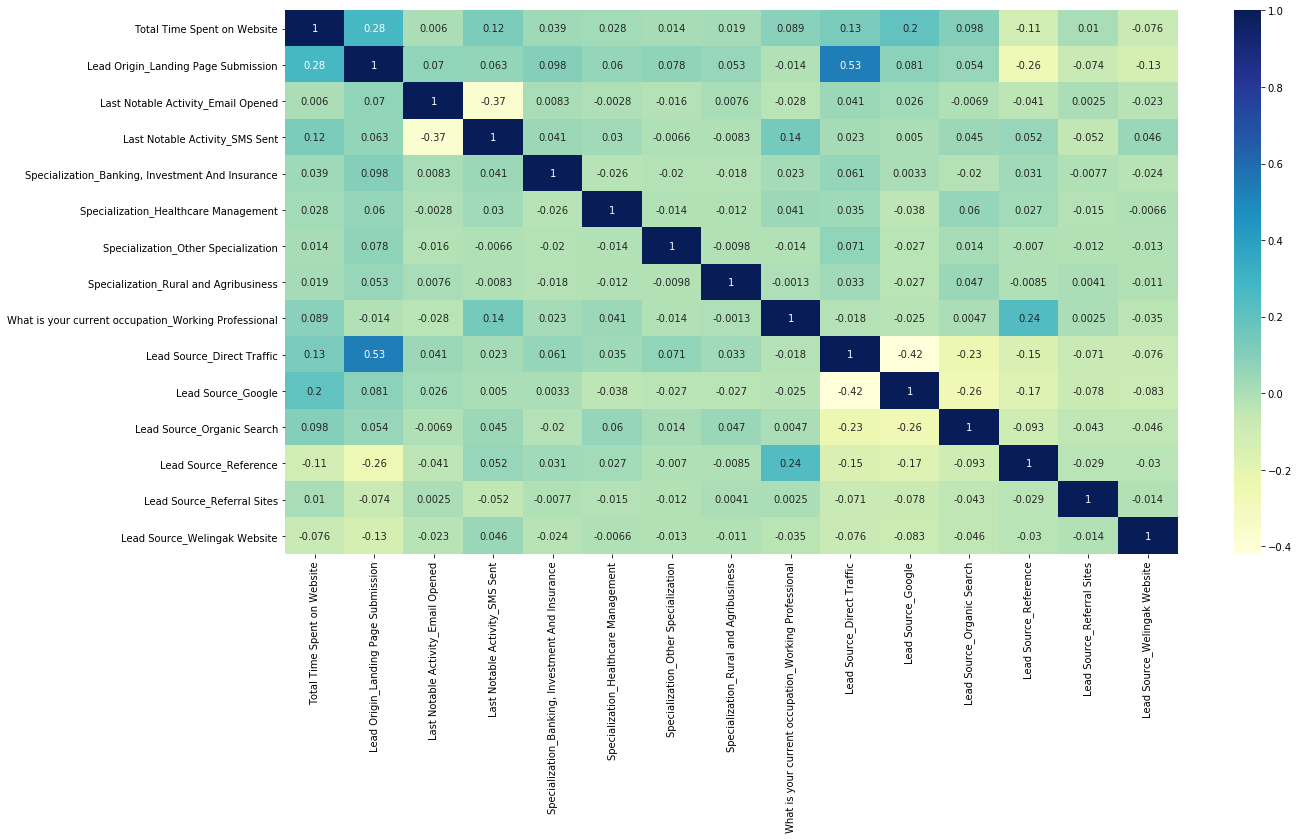

In [138]:
plt.figure(figsize = (20,10))
cor= X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.show()

###  Dropping the 1st Variable `Specialization_Other Specialization` and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [139]:
# Let's drop 'Specialization_Other Specialization' since it has a high p-values
col = col.drop('Specialization_Other Specialization', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Healthcare Management',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website'],
      dtype='object')

In [140]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6457
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2834.4
Date:                Sun, 31 May 2020   Deviance:                       5668.8
Time:                        15:20:47   Pearson chi2:                 6.75e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9332      0.084    -11.080      0.000      -1.098      -0.768
Total Time Spent on Website                              1.0954      0.038     28.509      0.000       1.020       1.171
Lead Origin_Landing Page Submission                     -0.3069      0.094     -3.267      0.001      -0.491      -0.123
Last Notable Activity_Email Opened                       0.7869      0.078     10.056      0.000       0.634       0.940
Last Notable Activity_SMS Sent                           2.0502      0.086     23.767      0.000       1.881       2.219
Specialization_Banking, Investment And Insurance         0.5388      0.176      3.056      0.002       0.193       0.884
Specialization_Healthcare Management                     0.3047      0.254      1.198      0.231      -0.194       0.803
Specialization_Rural and Agribusiness                    0.5307      0.361      1.468      0.142      -0.178       1.239
What is your current occupation_Working Professional     2.7621      0.186     14.880      0.000       2.398       3.126
Lead Source_Direct Traffic                              -0.9458      0.136     -6.947      0.000      -1.213      -0.679
Lead Source_Google                                      -0.6197      0.114     -5.457      0.000      -0.842      -0.397
Lead Source_Organic Search                              -0.8098      0.135     -5.990      0.000      -1.075      -0.545
Lead Source_Reference                                    2.8071      0.208     13.523      0.000       2.400       3.214
Lead Source_Referral Sites                              -1.0682      0.331     -3.231      0.001      -1.716      -0.420
Lead Source_Welingak Website                             4.8413      0.724      6.690      0.000       3.423       6.260
========================================================================================================================
"""

In [141]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1052    0.701547
8706    0.129418
4876    0.048480
6157    0.945479
5217    0.227146
2178    0.048757
8543    0.111247
8886    0.517211
9175    0.109871
4446    0.778068
dtype: float64

In [142]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.70154678, 0.12941797, 0.04847985, 0.9454793 , 0.2271462 ,
       0.04875724, 0.1112468 , 0.51721146, 0.10987081, 0.77806826])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [143]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.701547,1052
1,0,0.129418,8706
2,0,0.048480,4876
3,1,0.945479,6157
4,1,0.227146,5217


In [144]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,1,0.701547,1052,1
1,0,0.129418,8706,0
2,0,0.048480,4876,0
3,1,0.945479,6157,1
4,1,0.227146,5217,0


In [145]:
from sklearn import metrics

In [146]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3473  464]
 [ 811 1709]]


In [147]:
# Predicted     not_churn    churn
# Actual
# not_churn        3473       464    
# churn            811       1709

In [148]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8025398792008672


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [149]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,4.45
8,Lead Source_Direct Traffic,3.37
9,Lead Source_Google,2.24
2,Last Notable Activity_Email Opened,1.54
10,Lead Source_Organic Search,1.52
3,Last Notable Activity_SMS Sent,1.49
7,What is your current occupation_Working Profes...,1.18
11,Lead Source_Reference,1.17
0,Total Time Spent on Website,1.09
4,"Specialization_Banking, Investment And Insurance",1.05


### Dropping the 2nd  Variable `Specialization_Healthcare Management` and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [150]:
# Let's drop 'Specialization_Healthcare Management' given since it has a high p-values
col = col.drop('Specialization_Healthcare Management')
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website'],
      dtype='object')

In [151]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6457
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2835.1
Date:                Sun, 31 May 2020   Deviance:                       5670.2
Time:                        15:20:48   Pearson chi2:                 6.77e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9322      0.084    -11.069      0.000      -1.097      -0.767
Total Time Spent on Website                              1.0956      0.038     28.516      0.000       1.020       1.171
Lead Origin_Landing Page Submission                     -0.3012      0.094     -3.210      0.001      -0.485      -0.117
Last Notable Activity_Email Opened                       0.7874      0.078     10.065      0.000       0.634       0.941
Last Notable Activity_SMS Sent                           2.0515      0.086     23.783      0.000       1.882       2.221
Specialization_Banking, Investment And Insurance         0.5314      0.176      3.015      0.003       0.186       0.877
Specialization_Rural and Agribusiness                    0.5218      0.361      1.444      0.149      -0.187       1.230
What is your current occupation_Working Professional     2.7620      0.186     14.886      0.000       2.398       3.126
Lead Source_Direct Traffic                              -0.9449      0.136     -6.941      0.000      -1.212      -0.678
Lead Source_Google                                      -0.6214      0.114     -5.472      0.000      -0.844      -0.399
Lead Source_Organic Search                              -0.8020      0.135     -5.942      0.000      -1.067      -0.537
Lead Source_Reference                                    2.8168      0.207     13.580      0.000       2.410       3.223
Lead Source_Referral Sites                              -1.0701      0.331     -3.237      0.001      -1.718      -0.422
Lead Source_Welingak Website                             4.8467      0.724      6.697      0.000       3.428       6.265
========================================================================================================================
"""

In [152]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1052    0.702793
8706    0.129508
4876    0.048827
6157    0.945776
5217    0.228590
2178    0.049107
8543    0.112045
8886    0.517109
9175    0.110661
4446    0.779204
dtype: float64

In [153]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.70279263, 0.12950792, 0.04882741, 0.94577559, 0.22858994,
       0.04910673, 0.11204549, 0.51710912, 0.1106606 , 0.77920389])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [154]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.702793,1052
1,0,0.129508,8706
2,0,0.048827,4876
3,1,0.945776,6157
4,1,0.228590,5217


In [155]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,1,0.702793,1052,1
1,0,0.129508,8706,0
2,0,0.048827,4876,0
3,1,0.945776,6157,1
4,1,0.228590,5217,0


In [156]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3474  463]
 [ 810 1710]]


In [157]:
# Predicted     not_churn    churn
# Actual
# not_churn        3474       463    
# churn            810       1710

In [158]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8028496205668267


The accuracy has slightly increased.

##### Let's now check the VIFs again

In [159]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,4.44
7,Lead Source_Direct Traffic,3.37
8,Lead Source_Google,2.24
2,Last Notable Activity_Email Opened,1.54
9,Lead Source_Organic Search,1.51
3,Last Notable Activity_SMS Sent,1.48
6,What is your current occupation_Working Profes...,1.18
10,Lead Source_Reference,1.17
0,Total Time Spent on Website,1.09
4,"Specialization_Banking, Investment And Insurance",1.05


### Dropping the 3rd Variable `Specialization_Rural and Agribusiness`and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [160]:
# Let's drop 'Specialization_Rural and Agribusiness' since it has a high p-values
col = col.drop('Specialization_Rural and Agribusiness', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent',
       'Specialization_Banking, Investment And Insurance',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website'],
      dtype='object')

In [161]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6457
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2836.1
Date:                Sun, 31 May 2020   Deviance:                       5672.2
Time:                        15:20:49   Pearson chi2:                 6.77e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9307      0.084    -11.055      0.000      -1.096      -0.766
Total Time Spent on Website                              1.0954      0.038     28.517      0.000       1.020       1.171
Lead Origin_Landing Page Submission                     -0.2971      0.094     -3.170      0.002      -0.481      -0.113
Last Notable Activity_Email Opened                       0.7878      0.078     10.070      0.000       0.634       0.941
Last Notable Activity_SMS Sent                           2.0488      0.086     23.769      0.000       1.880       2.218
Specialization_Banking, Investment And Insurance         0.5258      0.176      2.985      0.003       0.180       0.871
What is your current occupation_Working Professional     2.7612      0.185     14.888      0.000       2.398       3.125
Lead Source_Direct Traffic                              -0.9432      0.136     -6.932      0.000      -1.210      -0.677
Lead Source_Google                                      -0.6223      0.114     -5.481      0.000      -0.845      -0.400
Lead Source_Organic Search                              -0.7940      0.135     -5.892      0.000      -1.058      -0.530
Lead Source_Reference                                    2.8212      0.207     13.603      0.000       2.415       3.228
Lead Source_Referral Sites                              -1.0644      0.331     -3.218      0.001      -1.713      -0.416
Lead Source_Welingak Website                             4.8453      0.724      6.695      0.000       3.427       6.264
========================================================================================================================
"""

In [162]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1052    0.703778
8706    0.129705
4876    0.049172
6157    0.945983
5217    0.229928
2178    0.049453
8543    0.112816
8886    0.517209
9175    0.111423
4446    0.779513
dtype: float64

In [163]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.70377842, 0.12970497, 0.04917179, 0.94598304, 0.22992785,
       0.04945293, 0.11281615, 0.51720867, 0.11142317, 0.77951278])

In [164]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.703778,1052
1,0,0.129705,8706
2,0,0.049172,4876
3,1,0.945983,6157
4,1,0.229928,5217


In [165]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,1,0.703778,1052,1
1,0,0.129705,8706,0
2,0,0.049172,4876,0
3,1,0.945983,6157,1
4,1,0.229928,5217,0


In [166]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3474,  463],
       [ 810, 1710]], dtype=int64)

In [167]:
# Predicted     not_churn    churn
# Actual
# not_churn        3474       463    
# churn            810       1710

In [168]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8028496205668267

Checking VIFs

In [169]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,4.43
6,Lead Source_Direct Traffic,3.36
7,Lead Source_Google,2.24
2,Last Notable Activity_Email Opened,1.54
8,Lead Source_Organic Search,1.51
3,Last Notable Activity_SMS Sent,1.48
5,What is your current occupation_Working Profes...,1.18
9,Lead Source_Reference,1.17
0,Total Time Spent on Website,1.09
4,"Specialization_Banking, Investment And Insurance",1.05


### Dropping the 4th Variable `Specialization_Banking, Investment And Insurance` and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [170]:
# Let's drop 'Specialization_Banking, Investment And Insurance' 
col = col.drop('Specialization_Banking, Investment And Insurance', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website'],
      dtype='object')

In [171]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6457
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2840.5
Date:                Sun, 31 May 2020   Deviance:                       5681.1
Time:                        15:20:51   Pearson chi2:                 6.79e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9259      0.084    -11.008      0.000      -1.091      -0.761
Total Time Spent on Website                              1.0960      0.038     28.548      0.000       1.021       1.171
Lead Origin_Landing Page Submission                     -0.2764      0.093     -2.958      0.003      -0.460      -0.093
Last Notable Activity_Email Opened                       0.7906      0.078     10.115      0.000       0.637       0.944
Last Notable Activity_SMS Sent                           2.0556      0.086     23.866      0.000       1.887       2.224
What is your current occupation_Working Professional     2.7508      0.185     14.856      0.000       2.388       3.114
Lead Source_Direct Traffic                              -0.9400      0.136     -6.914      0.000      -1.207      -0.674
Lead Source_Google                                      -0.6228      0.113     -5.489      0.000      -0.845      -0.400
Lead Source_Organic Search                              -0.7972      0.135     -5.920      0.000      -1.061      -0.533
Lead Source_Reference                                    2.8381      0.207     13.704      0.000       2.432       3.244
Lead Source_Referral Sites                              -1.0586      0.331     -3.198      0.001      -1.708      -0.410
Lead Source_Welingak Website                             4.8394      0.724      6.687      0.000       3.421       6.258
========================================================================================================================
"""

In [172]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1052    0.709729
8706    0.130187
4876    0.050512
6157    0.946895
5217    0.235564
2178    0.050800
8543    0.115971
8886    0.518462
9175    0.114543
4446    0.785005
dtype: float64

In [173]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.70972866, 0.13018685, 0.05051158, 0.94689487, 0.23556391,
       0.05080012, 0.11597064, 0.51846229, 0.11454304, 0.78500457])

In [174]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.709729,1052
1,0,0.130187,8706
2,0,0.050512,4876
3,1,0.946895,6157
4,1,0.235564,5217


In [175]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,1,0.709729,1052,1
1,0,0.130187,8706,0
2,0,0.050512,4876,0
3,1,0.946895,6157,1
4,1,0.235564,5217,0


In [176]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3479,  458],
       [ 806, 1714]], dtype=int64)

In [177]:
# Predicted     not_churn    churn
# Actual
# not_churn        3479       458    
# churn            806       1714

In [178]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8042434567136441

In [179]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,4.41
5,Lead Source_Direct Traffic,3.36
6,Lead Source_Google,2.24
2,Last Notable Activity_Email Opened,1.54
7,Lead Source_Organic Search,1.51
3,Last Notable Activity_SMS Sent,1.48
4,What is your current occupation_Working Profes...,1.18
8,Lead Source_Reference,1.17
0,Total Time Spent on Website,1.09
10,Lead Source_Welingak Website,1.03


### Dropping the 5th Variable `Lead Origin_Landing Page Submission`and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [180]:
# Let's drop 'Lead Origin_Landing Page Submission' since it has a high VIF
col = col.drop('Lead Origin_Landing Page Submission', 1)
col

Index(['Total Time Spent on Website', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website'],
      dtype='object')

In [181]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6457
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2844.9
Date:                Sun, 31 May 2020   Deviance:                       5689.8
Time:                        15:20:52   Pearson chi2:                 6.78e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9250      0.084    -11.013      0.000      -1.090      -0.760
Total Time Spent on Website                              1.0908      0.038     28.506      0.000       1.016       1.166
Last Notable Activity_Email Opened                       0.7783      0.078      9.983      0.000       0.626       0.931
Last Notable Activity_SMS Sent                           2.0382      0.086     23.764      0.000       1.870       2.206
What is your current occupation_Working Professional     2.7388      0.185     14.815      0.000       2.376       3.101
Lead Source_Direct Traffic                              -1.1945      0.106    -11.250      0.000      -1.403      -0.986
Lead Source_Google                                      -0.7780      0.101     -7.676      0.000      -0.977      -0.579
Lead Source_Organic Search                              -0.9508      0.125     -7.625      0.000      -1.195      -0.706
Lead Source_Reference                                    2.8397      0.207     13.722      0.000       2.434       3.245
Lead Source_Referral Sites                              -1.1019      0.332     -3.320      0.001      -1.752      -0.451
Lead Source_Welingak Website                             4.8397      0.724      6.688      0.000       3.421       6.258
========================================================================================================================
"""

In [182]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1052    0.730041
8706    0.130804
4876    0.051798
6157    0.951349
5217    0.237318
2178    0.052092
8543    0.117385
8886    0.478001
9175    0.115949
4446    0.801355
dtype: float64

In [183]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.73004105, 0.13080424, 0.05179762, 0.95134902, 0.23731806,
       0.05209171, 0.11738533, 0.4780006 , 0.11594934, 0.80135544])

In [184]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.730041,1052
1,0,0.130804,8706
2,0,0.051798,4876
3,1,0.951349,6157
4,1,0.237318,5217


In [185]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,1,0.730041,1052,1
1,0,0.130804,8706,0
2,0,0.051798,4876,0
3,1,0.951349,6157,1
4,1,0.237318,5217,0


In [186]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3476,  461],
       [ 802, 1718]], dtype=int64)

In [187]:
# Predicted     not_churn    churn
# Actual
# not_churn        3476       461    
# churn            802       1718

In [188]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8043983273966239

In [189]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Last Notable Activity_Email Opened,1.53
2,Last Notable Activity_SMS Sent,1.48
5,Lead Source_Google,1.41
4,Lead Source_Direct Traffic,1.38
3,What is your current occupation_Working Profes...,1.18
6,Lead Source_Organic Search,1.17
7,Lead Source_Reference,1.17
0,Total Time Spent on Website,1.09
9,Lead Source_Welingak Website,1.03
8,Lead Source_Referral Sites,1.01


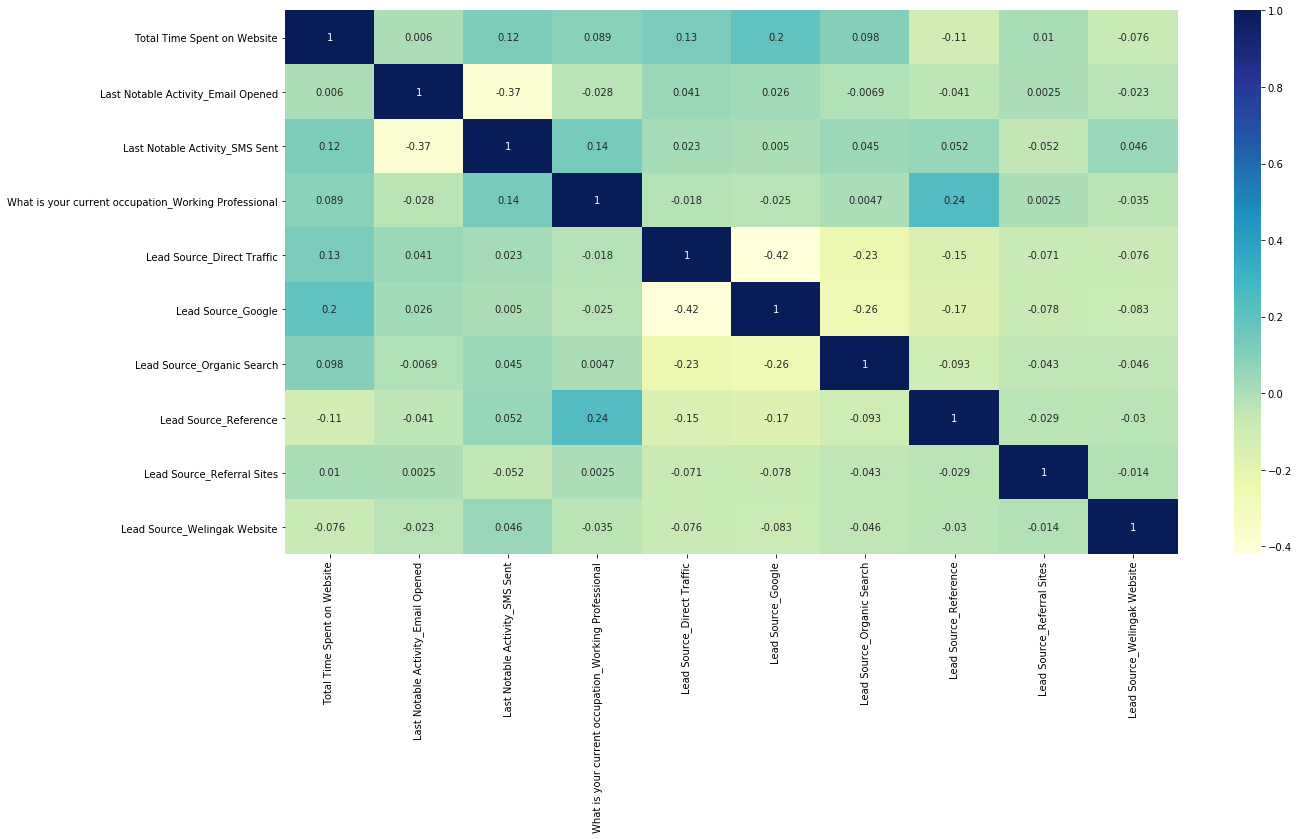

In [190]:
plt.figure(figsize = (20,10))
cor= X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.show()

Our latest model have the following features:
- All variables have p-value < 0.05. 
- All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map.
- The overall accuracy of 80.43 at a probability threshold of 0.05 is also very acceptable.

So we need not drop any more variables and we can proceed with making predictions using this model only.

### 5.1.2  Calculating Metrics beyond simply accuracy

In [191]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [192]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6817460317460318

In [193]:
# Let us calculate specificity
TN / float(TN+FP)

0.8829057658115316

In [194]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.11709423418846837


In [195]:
# positive predictive value 
print (TP / float(TP+FP))

0.7884350619550252


In [196]:
# Negative predictive value
print (TN / float(TN+ FN))

0.812529219261337


###  Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [197]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [198]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = 
                                         False )

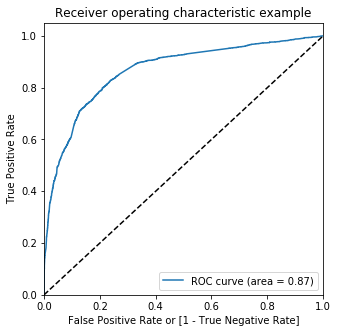

In [199]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Calculating the area under the curve(GINI)

In [200]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [201]:
auc = auc_val(fpr,tpr)
auc

0.8659470489575852

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

Since we got a value of 0.86, our model seems to be doing well on the test dataset.

###  Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [202]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.730041,1052,1,1,1,1,1,1,1,1,1,0,0
1,0,0.130804,8706,0,1,1,0,0,0,0,0,0,0,0
2,0,0.051798,4876,0,1,0,0,0,0,0,0,0,0,0
3,1,0.951349,6157,1,1,1,1,1,1,1,1,1,1,1
4,1,0.237318,5217,0,1,1,1,0,0,0,0,0,0,0


In [203]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.390274  1.000000  0.000000
0.1   0.1  0.526715  0.969048  0.243586
0.2   0.2  0.739043  0.903175  0.633985
0.3   0.3  0.787672  0.821429  0.766066
0.4   0.4  0.799442  0.752381  0.829566
0.5   0.5  0.804398  0.681746  0.882906
0.6   0.6  0.784730  0.567460  0.923800
0.7   0.7  0.773579  0.498413  0.949708
0.8   0.8  0.748180  0.400000  0.971044
0.9   0.9  0.705591  0.265873  0.987046


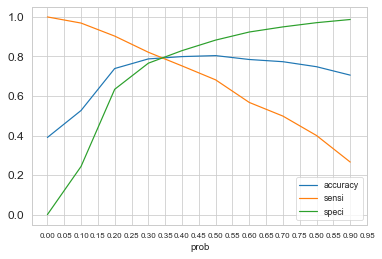

In [204]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid")
sns.set_context("paper")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, step=0.05), size = 8)
plt.yticks(size = 12)
plt.show()

#### From the curve above, 0.33 is the optimum point to take it as a cutoff probability.

In [205]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.730041,1052,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.130804,8706,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.051798,4876,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.951349,6157,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.237318,5217,0,1,1,1,0,0,0,0,0,0,0,0


In [206]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.791389190026328

In [207]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3079,  858],
       [ 489, 2031]], dtype=int64)

In [208]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [209]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.805952380952381

In [210]:
# Let us calculate specificity
TN / float(TN+FP)

0.7820675641351282

In [211]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.21793243586487174


In [212]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7030114226375909


In [213]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8629484304932735


## Precision and Recall

In [214]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3476,  461],
       [ 802, 1718]], dtype=int64)

##### Precision
TP / TP + FP

In [215]:
precision= confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])
precision

0.7030114226375909

##### Recall
TP / TP + FN

In [216]:
recall= confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])
recall

0.805952380952381

Using sklearn utilities for the same

In [217]:
from sklearn.metrics import precision_score, recall_score

In [218]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7030114226375909

In [219]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.805952380952381

### Precision and recall tradeoff

In [220]:
from sklearn.metrics import precision_recall_curve

In [221]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       1
 1       0
 2       0
 3       1
 4       1
        ..
 6452    1
 6453    1
 6454    0
 6455    0
 6456    0
 Name: Converted, Length: 6457, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6452    0
 6453    1
 6454    1
 6455    0
 6456    0
 Name: final_predicted, Length: 6457, dtype: int64)

In [222]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

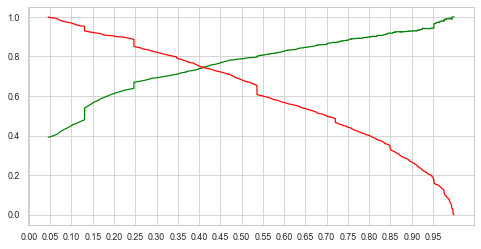

In [223]:
plt.figure(figsize=(8, 4))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

From the precision-recall graph above, we get the optical threshold value as close to 0.41. However our business requirement here is to have Lead Conversion Rate around 80%.

This is already achieved with our earlier threshold value of 0.33. So we will stick to this value.

Calculating the F1 score
F1 = 2×(Precision*Recall)/(Precision+Recall)

In [224]:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.7509706045479756

## 5.2  Making predictions on the test set

In [225]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test
                                                         [['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Origin_Landing Page Submission,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
3195,0.786096,-0.415509,1.746240,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5162,1.083746,0.995089,-0.019397,1,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4878,-0.404503,0.783408,-0.178161,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4812,-0.999803,-0.888141,-1.140361,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7055,-0.106853,-0.762227,0.302940,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0


In [226]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Last Notable Activity_Email Opened,Last Notable Activity_SMS Sent,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
3195,-0.415509,0,1,0,0,0,1,0,0,0
5162,0.995089,0,1,0,0,0,1,0,0,0
4878,0.783408,1,0,1,0,1,0,0,0,0
4812,-0.888141,0,0,0,0,0,0,0,0,1
7055,-0.762227,0,1,1,1,0,0,0,0,0


In [227]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [228]:
y_test_pred = res.predict(X_test_sm)

In [229]:
y_test_pred[:10]

3195    0.427797
5162    0.776934
4878    0.935151
4812    0.950066
7055    0.861283
4826    0.897991
6579    0.814010
1254    0.948606
2064    0.463619
7993    0.816725
dtype: float64

In [230]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [231]:
# Let's see the head
y_pred_1.head()

,0
3195,0.427797
5162,0.776934
4878,0.935151
4812,0.950066
7055,0.861283


In [232]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [233]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [234]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [235]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [236]:
y_pred_final.head()

,Converted,LeadID,0
0,0,3195,0.427797
1,0,5162,0.776934
2,1,4878,0.935151
3,1,4812,0.950066
4,1,7055,0.861283


In [237]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [238]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Conversion_Prob'], axis=1)

In [239]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
0,3195,0,0.427797
1,5162,0,0.776934
2,4878,1,0.935151
3,4812,1,0.950066
4,7055,1,0.861283


In [240]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.33 else 0)

In [241]:
y_pred_final

,LeadID,Converted,Conversion_Prob,final_predicted
0,3195,0,0.427797,1
1,5162,0,0.776934,1
2,4878,1,0.935151,1
3,4812,1,0.950066,1
4,7055,1,0.861283,1
...,...,...,...,...
2763,3420,1,0.536026,1
2764,7341,0,0.130804,0
2765,8000,0,0.138201,0
2766,8597,1,0.991645,1


In [242]:
# Let's check the overall accuracy.
acc_score= metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
acc_score

0.8081647398843931

In [244]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [245]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8341369334619093

In [246]:
# Let us calculate specificity
TN / float(TN+FP)

0.7926054303870596

In [247]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/ float(TN+FP)

0.2073945696129405

In [248]:
# Positive predictive value 
TP / float(TP+FP)

0.7066993464052288

In [249]:
# Negative predictive value
TN / float(TN+ FN)

0.8886010362694301

In [250]:
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

0.7066993464052288

In [251]:
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

0.8341369334619093

In [252]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.7651481645289695

Classification Report

In [253]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1731
           1       0.71      0.83      0.77      1037

    accuracy                           0.81      2768
   macro avg       0.80      0.81      0.80      2768
weighted avg       0.82      0.81      0.81      2768



Cross Validation Score

To avoid overfitting, let us calculate the Cross Validation Score to see how our model performs

In [254]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.74295011 0.7483731  0.77356446 0.79631636 0.79956663 0.80043384
 0.8212351  0.82429501 0.82448537 0.83947939]
0.7970699384023145


Plotting the ROC Curve for Test Dataset

In [255]:
def draw_roc( actual, probs ):    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [256]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

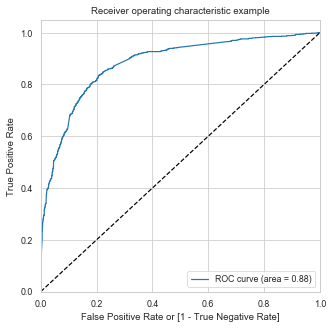

In [257]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

Calculating the Area Under the Curve(GINI)

In [258]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [259]:
auc = auc_val(fpr,tpr)
auc

0.881288345096261

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

Since we got a value of 0.88, our model seems to be doing well on the test dataset.

## Step 6:Final Analysis

### 6.1 Calculating Lead score for the entire dataset
### Lead Score = 100 * ConversionProbability
This needs to be calculated for all the leads from the original dataset (train + test)

In [260]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,3195,0,0.427797,1
1,5162,0,0.776934,1
2,4878,1,0.935151,1
3,4812,1,0.950066,1
4,7055,1,0.861283,1


In [261]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.730041,1052,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.130804,8706,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.051798,4876,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.951349,6157,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.237318,5217,0,1,1,1,0,0,0,0,0,0,0,0


In [262]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['LeadID','Converted','Conversion_Prob','final_predicted']]
leads_train_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,1052,1,0.730041,1
1,8706,0,0.130804,0
2,4876,0,0.051798,0
3,6157,1,0.951349,1
4,5217,1,0.237318,0


### Concatenating the train and the test dataset with the Conversion Probabilities

In [263]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,1052,1,0.730041,1
1,8706,0,0.130804,0
2,4876,0,0.051798,0
3,6157,1,0.951349,1
4,5217,1,0.237318,0


In [264]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6457, 4)
(2768, 4)
(9225, 4)


In [265]:
# Ensuring the LeadIDs are unique for each lead in the finl dataframe
len(lead_full_pred['LeadID'].unique().tolist())

9225

In [266]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted,Lead_Score
0,1052,1,0.730041,1,73
1,8706,0,0.130804,0,13
2,4876,0,0.051798,0,5
3,6157,1,0.951349,1,95
4,5217,1,0.237318,0,24


In [267]:
# Inspecing the max LeadID
lead_full_pred.LeadID.max()

9239

In [268]:
# Making the LeadID column as index
# We willlater join it with the original_leads dataframe based on index
lead_full_pred = lead_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
lead_full_pred

,Converted,Conversion_Prob,final_predicted,Lead_Score
LeadID,,,,
0,0,0.130804,0,13
1,0,0.326371,0,33
2,1,0.676899,1,68
3,0,0.077184,0,8
4,1,0.542578,1,54
...,...,...,...,...
9235,1,0.642054,1,64
9236,0,0.359765,1,36
9237,0,0.342084,1,34


In [269]:
lead_full_pred.sort_values(by='Lead_Score', ascending= False)

,Converted,Conversion_Prob,final_predicted,Lead_Score
LeadID,,,,
5794,1,0.996740,1,100
5671,1,0.997897,1,100
8077,1,0.996740,1,100
5695,1,0.996740,1,100
5697,1,0.996740,1,100
...,...,...,...,...
1601,0,0.044258,0,4
8279,0,0.043590,0,4
3252,0,0.044343,0,4


In [270]:
# Slicing the Lead Number column from original_leads dataframe
original_leads = leads[['Lead Number']]
original_leads.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


### Concatenating the 2 dataframes based on index.

This is done so that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.

In [271]:
# Concatenating the 2 dataframes based on index and displaying the top 10 rows
# This is done so that Lead Score is associated to the Lead Number of each Lead. 
# This will help in quick identification of the lead.
leads_with_score = pd.concat([original_leads, lead_full_pred], axis=1)
leads_with_score.head(10)

,Lead Number,Converted,Conversion_Prob,final_predicted,Lead_Score
0,660737,0,0.130804,0,13
1,660728,0,0.326371,0,33
2,660727,1,0.676899,1,68
3,660719,0,0.077184,0,8
4,660681,1,0.542578,1,54
5,660680,0,0.130804,0,13
6,660673,1,0.643992,1,64
7,660664,0,0.130804,0,13
8,660624,0,0.102596,0,10
9,660616,0,0.144541,0,14


In [272]:
# Inspecting the dataframe shape
leads_with_score.shape

(9225, 5)

In [273]:
# Inspecting if the final dataframe has any null values

total = pd.DataFrame(leads_with_score.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_with_score.isnull().sum()/leads_with_score.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead_Score,0,0.0
final_predicted,0,0.0
Conversion_Prob,0,0.0
Converted,0,0.0
Lead Number,0,0.0


### Determining Feature Importance

Selecting the coefficients of the selected features from our final model excluding the intercept

In [274]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Total Time Spent on Website                             1.09
Last Notable Activity_Email Opened                      0.78
Last Notable Activity_SMS Sent                          2.04
What is your current occupation_Working Professional    2.74
Lead Source_Direct Traffic                             -1.19
Lead Source_Google                                     -0.78
Lead Source_Organic Search                             -0.95
Lead Source_Reference                                   2.84
Lead Source_Referral Sites                             -1.10
Lead Source_Welingak Website                            4.84
dtype: float64

Selecting Top 10 features which contribute most towards the probability of a lead getting converted

In [276]:
feature_importance = new_params
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(10)

,index,0
9,Lead Source_Welingak Website,4.84
7,Lead Source_Reference,2.84
3,What is your current occupation_Working Profes...,2.74
2,Last Notable Activity_SMS Sent,2.04
0,Total Time Spent on Website,1.09
1,Last Notable Activity_Email Opened,0.78
5,Lead Source_Google,-0.78
6,Lead Source_Organic Search,-0.95
8,Lead Source_Referral Sites,-1.10
4,Lead Source_Direct Traffic,-1.19


## Step 7: Conclusion

Based on our model, some features are identified which contribute most to a Lead getting converted successfully.
The conversion probability of a lead increases with increase in values of the following features in descending order:<br>
Features with Positive Coefficient:<br>

1) Lead Source_Welingak Website:	                             4.84<br>
2) Lead Source_Reference:	                                     2.84<br>
3) What is your current occupation_Working Professional:	     2.74<br>
4) Last Notable Activity_SMS Sent:                      	     2.04<br>
5) Total Time Spent on Website:	                                 1.09<br>
6) Last Notable Activity_Email Opened:	                         0.78<br>

The conversion probability of a lead increases with decrease in values of the following features in descending order:<br>

Features with Negative Coefficient:<br>

1) Lead Source_Google:                             -0.78<br>
2) Lead Source_Organic Search:	                   -0.95<br>
3) Lead Source_Referral Sites:	                   -1.10<br>
4) Lead Source_Direct Traffic:	                   -1.19<br>


1) The first two features are from Lead Source category. So we need to pay more attention on leads coming from Welingak Website and Reference. We need to start promoting more on these websites of  Wenlingak Website by popping adds with offers to tempt the customers.<br>
2) We need to call people who have enrolled to our courses and offer them certain discounts in their fee if they provide references to others who turn out Hot Leads.<br>
3) We need to focus more on person those are working as they have money and esteem to grow in their current profile so they can be our Hot leads.<br>
4) We can move into the fourth variable SMS sent back by student. We need to monitor who all sent back SMS response and let our sales team call them and provide offers and convert them into Hot Leads.<br>
5) The next variable being time spent by the clients on website. More the time they spend more the chances of them trying to understand the course and more the chance of becoming a Hot  Lead. So we find out who spends most time and let the sales team call them and give them some discounts or offers.<br>
6) The next variable is Last Notable Activity was Email Opened, sales team can forward some nurturing emails regarding our courses and attractive offers to join the courses to people those who spend more time in reading the emails so that they can be converted to Hot leads.<br>
7) By following all the above mentioned points we have a higher chances of achieving conversion rate of Leads close to 80%.

**Comparison between metrices of train and test data set<br>**

| Metrics     | train  |test    |
| ----------- | ------ |------- |
|Sensitivity  | 80.59  | 83.41  |
|Specificity  | 78.21  | 79.26  |
|Accuracy     | 80.44  | 80.81  |
|F1- Score    | 75.1   | 76.51  |

**X- Education company:- For increasing lead conversion rate (more than 80%) target the potential leads whose leads score are in the range of 60-100(higher score would mean that the lead is hot, i.e. is most likely to convert) and also try to get leads from the top 10 features which are selected by the model as they contribute most to a Lead getting converted successfully.**

**Recommendations**<br>

**1. If the company already reached its target for a quarter before the deadline.** <br>
Since the company already reached its target for a quarter before the deadline. 
The company can tune the model in such a way that they get moderate sensitivity and high specificity. So that they don’t need to make unnecessary call.<br>

**2.X Education has a period of 2 months every year during which they hire some interns. If company want to make the lead conversion more aggressive.**<br>
The company can tune the model in such a way that they get high sensitivity and moderate specificity. Since there are more interns the company can make more phone calls.